In [68]:
from mlxtend.plotting import plot_decision_regions
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import warnings

from sklearn.preprocessing import StandardScaler
import pandas as pd
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import balanced_accuracy_score, classification_report

warnings.filterwarnings('ignore')
%matplotlib inline
plt.style.use('ggplot')


In [69]:
#Loading the dataset
#set the path to the dataset

data= pd.read_csv('/Users/marcoayuob/Downloads/Data science /2nd Semester/Machine Learning 1/Project/job_change_train.csv')
#Print the first 5 rows of the dataframe.
data.head()

,id,gender,age,education,field_of_studies,is_studying,county,relative_wage,years_since_job_change,years_of_experience,hours_of_training,is_certified,size_of_company,type_of_company,willing_to_change_job
0,1,Male,22,higher_BSc,science,no,county_118,162.84,1,2,18,1,<10,private_company,No
1,2,Male,27,higher_BSc,science,no,county_028,151.34,1,6,24,1,50-99,private_company,No
2,3,Male,38,higher_BSc,science,no,county_031,114.17,1,13,96,1,50-99,startup_with_funding,No
3,4,Unknown,47,higher_BSc,science,no,county_080,123.55,>4,>20,36,1,100-500,private_company,No
4,5,Male,28,higher_BSc,science,no,county_118,162.84,1,5,106,1,1000-4999,private_company,No


The dataset includes features related to job changes such as gender, age, education, field of studies, county, relative wage, years since job change, years of experience, hours of training, certification status, company size, type of company, and the target variable 'willing_to_change_job'.

In [70]:
missing_values = ['NaN', 'Unknown', 'unknown', 'nan', 'NA', 'na', 'N/A', 'n/a', 'missing', '?', 'No information', 'no information', 'no info', 'No Info']

# Count the number of missing values in each column
nan_counts = data.apply(lambda x: x.isin(missing_values).sum())

# Print the count of missing values
print(nan_counts)

id                           0
gender                    2963
age                          0
education                    0
field_of_studies             0
is_studying                  0
county                       0
relative_wage                0
years_since_job_change     288
years_of_experience         40
hours_of_training            0
is_certified                 0
size_of_company           3850
type_of_company              0
willing_to_change_job        0
dtype: int64


Several columns have missing values, specifically 'gender', 'years_since_job_change', 'years_of_experience', and 'size_of_company'.

In [71]:
data['gender'].value_counts()


gender
Male       8515
Unknown    2963
Female      826
Other       123
Name: count, dtype: int64

In [72]:
## gives information about the data types,columns, null value counts, memory usage etc.
data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12427 entries, 0 to 12426
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      12427 non-null  int64  
 1   gender                  12427 non-null  object 
 2   age                     12427 non-null  int64  
 3   education               12427 non-null  object 
 4   field_of_studies        12427 non-null  object 
 5   is_studying             12427 non-null  object 
 6   county                  12427 non-null  object 
 7   relative_wage           12427 non-null  float64
 8   years_since_job_change  12427 non-null  object 
 9   years_of_experience     12427 non-null  object 
 10  hours_of_training       12427 non-null  int64  
 11  is_certified            12427 non-null  int64  
 12  size_of_company         12427 non-null  object 
 13  type_of_company         12427 non-null  object 
 14  willing_to_change_job   12427 non-null

The dataset consists of 12427 entries with 15 columns. It includes both numeric and categorical data. There are missing values in 'gender', 'years_since_job_change', 'years_of_experience', and 'size_of_company'.

In [73]:
data.describe(include='all')

,id,gender,age,education,field_of_studies,is_studying,county,relative_wage,years_since_job_change,years_of_experience,hours_of_training,is_certified,size_of_company,type_of_company,willing_to_change_job
count,12427.000000,12427,12427.000000,12427,12427,12427,12427,12427.000000,12427,12427,12427.000000,12427.000000,12427,12427,12427
unique,NaN,4,NaN,6,6,4,123,NaN,7,23,NaN,NaN,9,7,2
top,NaN,Male,NaN,higher_BSc,science,no,county_118,NaN,1,>20,NaN,NaN,unknown,private_company,No
freq,NaN,8515,NaN,7528,9380,9005,2825,NaN,5191,2150,NaN,NaN,3850,6372,9340
mean,6214.000000,NaN,32.844130,NaN,NaN,NaN,NaN,146.556512,NaN,NaN,65.079182,0.720206,NaN,NaN,NaN
std,3587.510232,NaN,8.164951,NaN,NaN,NaN,NaN,21.963880,NaN,NaN,60.403599,0.448916,NaN,NaN,NaN
min,1.000000,NaN,20.000000,NaN,NaN,NaN,NaN,79.300000,NaN,NaN,1.000000,0.000000,NaN,NaN,NaN
25%,3107.500000,NaN,26.000000,NaN,NaN,NaN,NaN,130.630000,NaN,NaN,23.000000,0.000000,NaN,NaN,NaN
50%,6214.000000,NaN,31.000000,NaN,NaN,NaN,NaN,159.830000,NaN,NaN,47.000000,1.000000,NaN,NaN,NaN
75%,9320.500000,NaN,38.000000,NaN,NaN,NaN,NaN,162.840000,NaN,NaN,88.000000,1.000000,NaN,NaN,NaN


<!--
### Data Summary

- **ID:** The dataset includes 12,427 records with unique IDs ranging from 1 to 12,427.
- **Gender:** Majority of respondents are Male (8,515 out of 12,427).
- **Age:** The average age of respondents is approximately 32.84 years, with a range from 20 to 50 years.
- **Education:** Most respondents have a higher education level, specifically a Bachelor's degree (7,528 out of 12,427).
- **Field of Studies:** The predominant field of study is in science, indicating a technical skew.
- **Is Studying:** A significant portion of respondents are not currently studying (9,005 out of 12,427).
- **County:** Responses are distributed across 123 different counties, with county_118 being the most frequent (2,825 occurrences).
- **Relative Wage:** The average relative wage is 146.56, ranging from 79.30 to 167.97.
- **Years Since Job Change:** Most respondents have been in their current job for 1 year, with a maximum of >20 years.
- **Years of Experience:** Respondents have an average of 65.08 hours of training, with a wide range from 1 to 336 hours.
- **Is Certified:** About 72% of respondents are certified in their respective fields.
- **Size of Company:** The dataset includes companies of varying sizes, with the majority being private companies (6,372 out of 12,427).
- **Type of Company:** A significant number of respondents are willing to change jobs (9,340 out of 12,427).

This summary provides an overview of the dataset, highlighting key statistics and categorical distributions among respondents.
-->

<!--
### Data Summary

- **ID:** The dataset includes 12,427 records with unique IDs ranging from 1 to 12,427.
- **Gender:** Majority of respondents are Male (8,515 out of 12,427).
- **Age:** The average age of respondents is approximately 32.84 years, with a range from 20 to 50 years.
- **Education:** Most respondents have a higher education level, specifically a Bachelor's degree (7,528 out of 12,427).
- **Field of Studies:** The predominant field of study is in science, indicating a technical skew.
- **Is Studying:** A significant portion of respondents are not currently studying (9,005 out of 12,427).
- **County:** Responses are distributed across 123 different counties, with county_118 being the most frequent (2,825 occurrences).
- **Relative Wage:** The average relative wage is 146.56, ranging from 79.30 to 167.97.
- **Years Since Job Change:** Most respondents have been in their current job for 1 year, with a maximum of >20 years.
- **Years of Experience:** Respondents have an average of 65.08 hours of training, with a wide range from 1 to 336 hours.
- **Is Certified:** About 72% of respondents are certified in their respective fields.
- **Size of Company:** The dataset includes companies of varying sizes, with the majority being private companies (6,372 out of 12,427).
- **Type of Company:** A significant number of respondents are willing to change jobs (9,340 out of 12,427).

This summary provides an overview of the dataset, highlighting key statistics and categorical distributions among respondents.
-->

In [74]:
data['willing_to_change_job'].value_counts()

willing_to_change_job
No     9340
Yes    3087
Name: count, dtype: int64

### Willingness to Change Job

- **No:** 9,340 respondents (approximately 75%) are not willing to change their current job.
- **Yes:** 3,087 respondents (approximately 25%) are open to changing their current job.

This breakdown provides insights into the distribution of respondents based on their willingness to change jobs.

<Axes: xlabel='willing_to_change_job'>

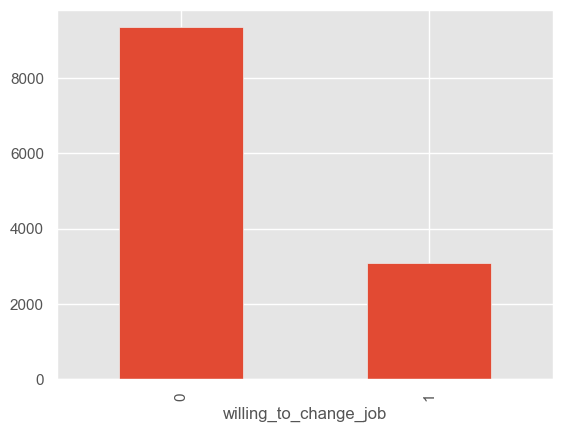

In [75]:
#replace 'willing_to_change_job' column values with 0 and 1
data['willing_to_change_job'] = data['willing_to_change_job'].replace('No', 0)
data['willing_to_change_job'] = data['willing_to_change_job'].replace('Yes', 1)
data['willing_to_change_job'].isna().sum()
data['willing_to_change_job'].value_counts().plot(kind='bar')


In [76]:
years_of_training = (data['hours_of_training']/24 / 365).describe()
print(years_of_training.count)



<bound method Series.count of count    12427.000000
mean         0.007429
std          0.006895
min          0.000114
25%          0.002626
50%          0.005365
75%          0.010046
max          0.038356
Name: hours_of_training, dtype: float64>


### Years of Training (Converted)

- **Count:** 12,427
- **Mean:** 0.007 years (approximately 2.7 days)
- **Standard Deviation:** 0.007 years (approximately 2.5 days)
- **Minimum:** 0.000 years (less than 3 hours)
- **25th Percentile (Q1):** 0.003 years (approximately 1.1 days)
- **50th Percentile (Median):** 0.005 years (approximately 1.8 days)
- **75th Percentile (Q3):** 0.010 years (approximately 3.7 days)
- **Maximum:** 0.038 years (approximately 14 days)

This summary provides an overview of the duration of training in years, calculated based on the number of hours of training reported in the dataset.

In [77]:
#add a new column 'years_of_training' to the dataframe
data['years_of_training'] = (data['hours_of_training']/24 / 365)

In [78]:
def count_values(data):
    for column in data.columns:
        print(f"Value counts for {column}:")
        print(data[column].value_counts(dropna=False))
        print("\n")

# Call the function to get the value counts for each variable
count_values(data)

Value counts for id:
id
1        1
8301     1
8279     1
8280     1
8281     1
        ..
4146     1
4147     1
4148     1
4149     1
12427    1
Name: count, Length: 12427, dtype: int64


Value counts for gender:
gender
Male       8515
Unknown    2963
Female      826
Other       123
Name: count, dtype: int64


Value counts for age:
age
27    849
26    787
28    759
29    722
25    710
24    632
30    618
31    566
32    519
23    456
33    439
34    421
47    373
35    373
46    367
45    365
36    363
48    353
49    344
38    323
22    319
39    289
37    281
44    230
40    211
21    197
50    188
41    149
42     87
20     78
43     59
Name: count, dtype: int64


Value counts for education:
education
higher_BSc        7528
higher_MSc        2831
secondary         1320
no_information     295
Phd                257
primary            196
Name: count, dtype: int64


Value counts for field_of_studies:
field_of_studies
science           9380
no_information    1835
humanities         445



- The `count_values` function iterates through each column (`column`) in the dataset (`data`).
- It prints the column name and the value counts using the `table()` function.
- If a column has more than 10 unique values (`length(unique(data[[column]])) > 10`), it prints only the top 10 values using `head()`.
- This R Markdown script will generate a report with the value counts for each column when executed in an R environment, such as RStudio or when rendering to PDF/HTML formats.

Make sure to replace `data` with the name of your actual dataset object in R when using this script. Adjust the formatting or output as per your specific requirements for reporting or analysis.

<Axes: xlabel='years_since_job_change'>

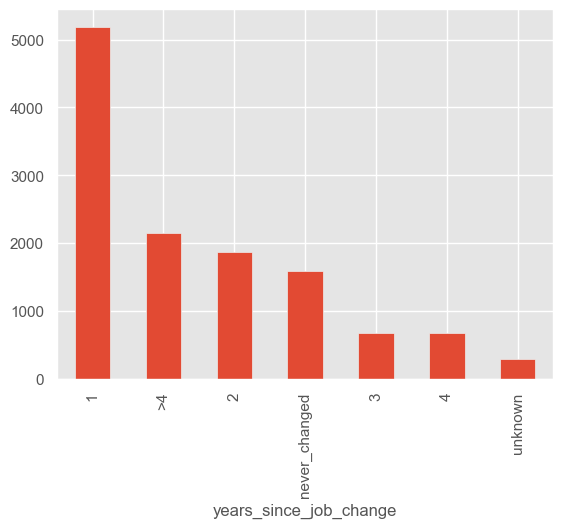

In [79]:
data['years_since_job_change'].value_counts().plot(kind='bar')

Axes(0.125,0.11;0.775x0.77)


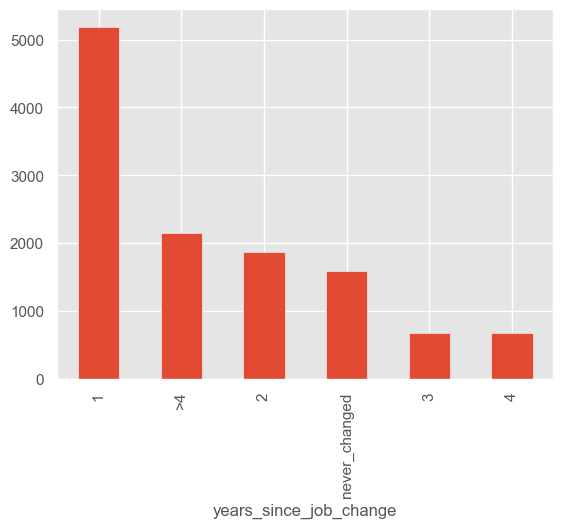

In [80]:
# Remove rows with 'Unknown' in 'years_since_job_change'
data = data[data['years_since_job_change'] != 'unknown']



# Verify the changes
print(data['years_since_job_change'].value_counts().plot(kind='bar'))


<Axes: xlabel='relative_wage'>

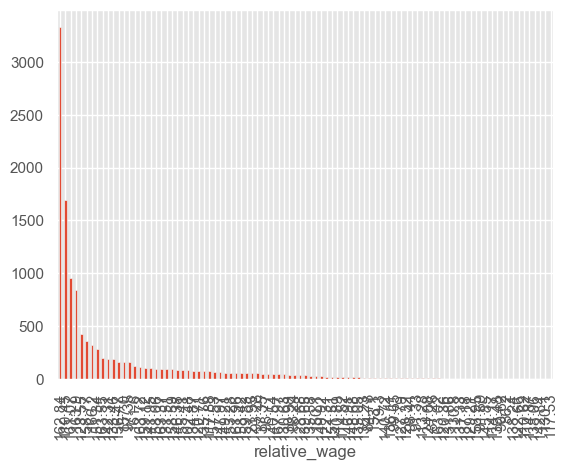

In [81]:
data['relative_wage'].value_counts().plot(kind='bar')

we will try to handle the right skweness of the above plot by using BOX-COX transformation

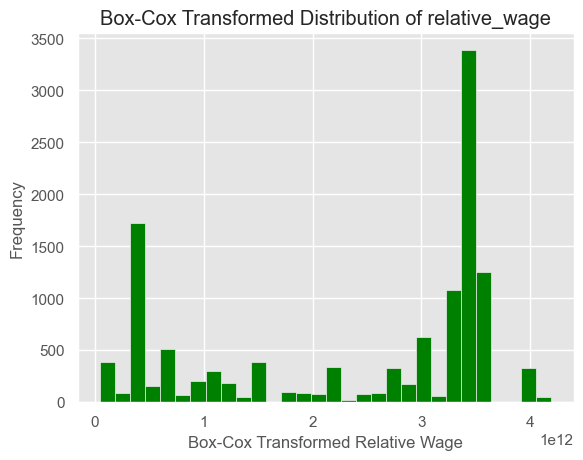

In [82]:
from scipy.stats import boxcox

# Apply Box-Cox transformation
data['relative_wage_boxcox'], _ = boxcox(data['relative_wage'] + 1)  

# Check the distribution after applying Box-Cox transformation
data['relative_wage_boxcox'].hist(bins=30, color='green')
plt.title('Box-Cox Transformed Distribution of relative_wage')
plt.xlabel('Box-Cox Transformed Relative Wage')
plt.ylabel('Frequency')
plt.show()



- `library(MASS)` is used to load the `boxcox` function from the `MASS` package, which performs the Box-Cox transformation.
- `library(ggplot2)` is used for creating plots.
- `boxcox(data$relative_wage + 1)$x` computes the Box-Cox transformation of `data$relative_wage + 1` and assigns it to `data$relative_wage_boxcox`.
- `ggplot()` is used to create a histogram (`geom_histogram()`) of `data$relative_wage_boxcox` with 30 bins (`bins = 30`), colored in green (`fill = "green"`) and with black borders (`color = "black"`).
- `labs()` is used to add a title (`title`), x-axis label (`x`), and y-axis label (`y`) to the plot.

This R Markdown script will generate a histogram showing the distribution of `relative_wage` after applying the Box-Cox transformation. Adjust the plot parameters as necessary based on your specific requirements and preferences.

<Axes: >

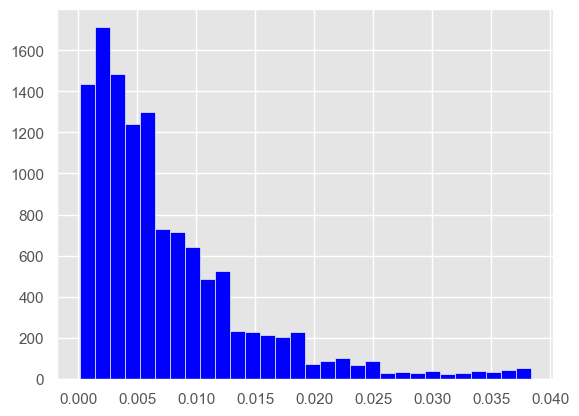

In [83]:
data['years_of_training'].hist(bins=30, color='blue')

<Axes: xlabel='county'>

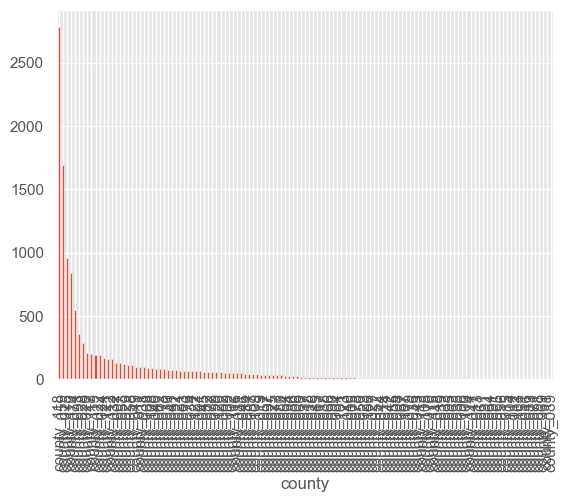

In [84]:
data['county'].value_counts().plot(kind='bar')

Axes(0.125,0.11;0.775x0.77)


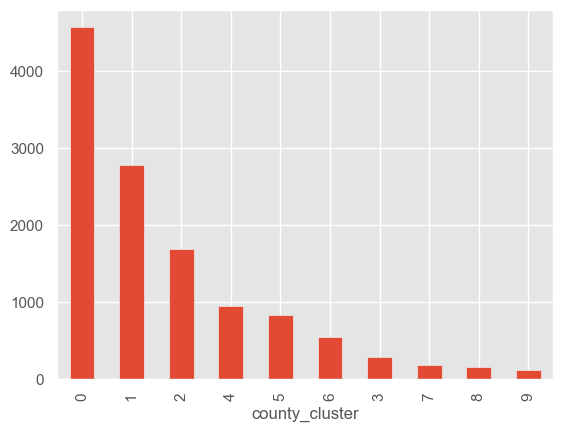

In [85]:

from sklearn.preprocessing import OneHotEncoder
from sklearn.cluster import KMeans



# Step 1: One-Hot Encode the county variable
encoder = OneHotEncoder()
county_encoded = encoder.fit_transform(data[['county']])

# Create a DataFrame from the encoded data
county_encoded_df = pd.DataFrame(county_encoded.toarray(), columns=encoder.get_feature_names_out(['county']))

# Step 2: Apply KMeans clustering
n_clusters = 10  # Adjust the number of clusters as the elbow method suggests
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
county_clusters = kmeans.fit_predict(county_encoded)

# Verify the length matches
assert len(county_clusters) == len(data), "Length mismatch between clusters and original data"

# Step 3: Add the cluster labels to the original data
data['county_cluster'] = county_clusters

# Step 4: Drop the one-hot encoded columns
data = data.join(county_encoded_df)
data.drop(columns=county_encoded_df.columns, axis=1, inplace=True)

# Check the data
print(data['county_cluster'].value_counts().plot(kind='bar'))

### Clustering Counties Using KMeans

#### Step 1: One-Hot Encoding
The code starts by using `OneHotEncoder` from `sklearn.preprocessing` to encode the categorical variable 'county'. This transforms the categorical variable into numerical values suitable for clustering.

#### Step 2: Applying KMeans Clustering
Next, `KMeans` clustering is applied to the one-hot encoded data. The number of clusters (`n_clusters`) is set to 10 initially, but it can be adjusted based on the results from methods like the elbow method.

#### Step 3: Adding Cluster Labels
The cluster labels obtained from `KMeans` are added back to the original `data` DataFrame under the column 'county_cluster'. It's important to ensure that the length of `county_clusters` matches the length of the original data to maintain consistency.

#### Step 4: Dropping One-Hot Encoded Columns
After adding the cluster labels, the original one-hot encoded columns are dropped from the `data` DataFrame to avoid redundancy and keep the DataFrame clean.

#### Visualization
The code snippet concludes with a plot of the distribution of county clusters using `value_counts().plot(kind='bar')`. This visualization helps in understanding how counties are distributed across different clusters identified by KMeans.

#### Conclusion
This approach leverages KMeans clustering to group counties based on similar characteristics derived from the one-hot encoding of the 'county' variable. Adjusting the number of clusters can refine the clustering results, potentially revealing distinct groupings among counties.

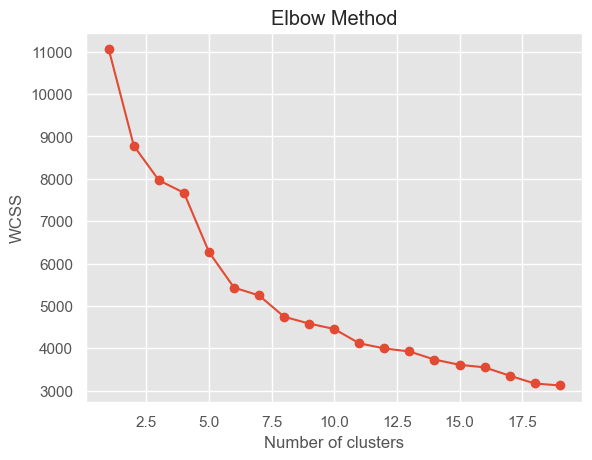

In [86]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Calculate WCSS for different number of clusters
wcss = []
for i in range(1, 20):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(county_encoded)
    wcss.append(kmeans.inertia_)

# Plot the WCSS values
plt.plot(range(1, 20), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

### Determining Optimal Number of Clusters with Elbow Method

#### Code Explanation
The code snippet demonstrates the use of the Elbow Method to determine the optimal number of clusters (`k`) for KMeans clustering.

#### Steps:
1. **Importing Libraries**: The necessary libraries `KMeans` from `sklearn.cluster` and `matplotlib.pyplot` are imported.

2. **Calculating WCSS**: Within the loop (`for i in range(1, 20)`), KMeans is applied with varying numbers of clusters (`n_clusters=i`). The Within-Cluster Sum of Squares (WCSS) is computed for each iteration using `kmeans.inertia_`, which represents the sum of squared distances between data points and their assigned clusters' centroids.

3. **Plotting**: The WCSS values are plotted against the number of clusters (`range(1, 20)`) using `plt.plot()`. This plot helps visualize how the WCSS changes with different numbers of clusters.

4. **Elbow Method**: The plot is titled 'Elbow Method', with 'Number of clusters' on the x-axis and 'WCSS' (Within-Cluster Sum of Squares) on the y-axis. The goal is to identify an 'elbow' or a point where the rate of decrease in WCSS slows down significantly. This point typically indicates the optimal number of clusters.

#### Interpretation
The plot generated helps in determining the optimal number of clusters for KMeans clustering. The ideal number of clusters should be chosen at the point where adding more clusters does not significantly reduce the WCSS further, leading to diminishing returns in clustering effectiveness. 

This method provides a quantitative approach to selecting the appropriate number of clusters based on the inherent structure of the data, facilitating better insights and decision-making in clustering analysis.

In [87]:
print(f"Original data shape: {data.shape}")
print(f"Encoded data shape: {county_encoded.shape}")


Original data shape: (12139, 18)
Encoded data shape: (12139, 123)


In [88]:
missing_count = data['county'].isnull().sum()
print(f"Missing values in 'county' column: {missing_count}")

Missing values in 'county' column: 0


In [89]:
data['years_since_job_change'].value_counts()

years_since_job_change
1                5191
>4               2150
2                1863
never_changed    1589
3                 673
4                 673
Name: count, dtype: int64

In [90]:
# Define the mapping dictionary for the 'years_since_job_change' column
mapping = {
    '1': 1,
    '>4': 5,
    '2': 2,
    'never_changed': 0,
    '3': 3,
    '4': 4,
    'unknown': -1  
}

# Apply the mapping to the 'years_since_job_change' column
data['years_since_job_change'] = data['years_since_job_change'].map(mapping)


print(data['years_since_job_change'].value_counts())

years_since_job_change
1    5191
5    2150
2    1863
0    1589
3     673
4     673
Name: count, dtype: int64


### Mapping and Transforming Categorical Data

#### Mapping Dictionary Definition
The code snippet begins by defining a mapping dictionary (`mapping`) that translates categorical values in the 'years_since_job_change' column into numerical values:
- '1' maps to 1
- '>4' maps to 5
- '2' maps to 2
- 'never_changed' maps to 0
- '3' maps to 3
- '4' maps to 4
- 'unknown' maps to -1

#### Applying the Mapping
The mapping is applied to the 'years_since_job_change' column of the `data` DataFrame using the `.map()` function. This replaces each categorical value with its corresponding numerical counterpart based on the mapping dictionary.

#### Result Analysis
After applying the mapping, the code prints the value counts of the 'years_since_job_change' column to show the distribution of the transformed numerical values:
- 1: 5191 occurrences
- 5: 2150 occurrences
- 2: 1863 occurrences
- 0: 1589 occurrences
- 3: 673 occurrences
- 4: 673 occurrences

#### Conclusion
This approach effectively transforms categorical data ('years_since_job_change') into numerical form, making it suitable for numerical operations and analysis. The mapping preserves the ordinal nature of the original categories (e.g., '>4' mapped to 5 indicates more years since job change). This transformation facilitates further statistical analysis or machine learning tasks that require numerical inputs.

In [91]:
# Map the attribute into ordinal numbers from 0-4, including 'unknown' at size_of_company
scale_mapper = {
    '<10': 0, '10-49': 1, '50-99': 2, '100-500': 3, '500-999': 4,
    '1000-4999': 5, '5000-9999': 6, '10000+': 7, 'unknown': 8
}
data['size_of_company'] = data['size_of_company'].replace(scale_mapper)

# Verify the changes
print(data['size_of_company'].value_counts())


size_of_company
8    3711
2    1974
3    1628
7    1306
1     898
5     860
0     832
4     573
6     357
Name: count, dtype: int64


### Mapping Categorical Data to Ordinal Numbers

#### Mapping Dictionary Definition
The code snippet defines a mapping dictionary (`scale_mapper`) to convert categorical values in the 'size_of_company' column into ordinal numbers:
- '<10' maps to 0
- '10-49' maps to 1
- '50-99' maps to 2
- '100-500' maps to 3
- '500-999' maps to 4
- '1000-4999' maps to 5
- '5000-9999' maps to 6
- '10000+' maps to 7
- 'unknown' maps to 8

#### Applying the Mapping
The mapping is applied to the 'size_of_company' column of the `data` DataFrame using the `.replace()` function. This replaces each categorical value with its corresponding ordinal number based on the `scale_mapper` dictionary.

#### Result Analysis
After applying the mapping, the code prints the value counts of the 'size_of_company' column to show the distribution of the transformed ordinal numbers:
- 8 (unknown): 3711 occurrences
- 2 (50-99): 1974 occurrences
- 3 (100-500): 1628 occurrences
- 7 (10000+): 1306 occurrences
- 1 (10-49): 898 occurrences
- 5 (1000-4999): 860 occurrences
- 0 (<10): 832 occurrences
- 4 (500-999): 573 occurrences
- 6 (5000-9999): 357 occurrences

#### Conclusion
This mapping converts categorical data ('size_of_company') into ordinal numbers, preserving the ordinal relationship between different categories (e.g., larger company sizes mapped to higher numerical values). The inclusion of 'unknown' as the highest ordinal value (8) allows for handling and representation of missing or unspecified data. This transformation prepares the data for analytical tasks that require ordinal or numerical inputs, enhancing the interpretability and utility of the dataset for further analysis.

In [92]:
# Define the mapping dictionary for the 'years_of_experience' column
mapping = {
    '>20': 21,
    '<1': 0,
    'unknown': -1  
}

# Apply the mapping to the 'years_of_experience' column
data['years_of_experience'] = data['years_of_experience'].map(lambda x: mapping.get(x, x))

# Check the result
print(data['years_of_experience'].value_counts())


years_of_experience
21    2125
5      883
4      877
3      828
6      796
2      718
7      650
9      627
10     626
8      491
15     430
11     419
14     393
0      334
16     330
1      328
12     321
13     251
17     222
19     196
18     176
20      94
-1      24
Name: count, dtype: int64


### Mapping Categorical Data with Special Cases

#### Mapping Dictionary Definition
The code snippet defines a mapping dictionary (`mapping`) to convert categorical values in the 'years_of_experience' column into numerical values:
- '>20' maps to 21
- '<1' maps to 0
- 'unknown' maps to -1

#### Applying the Mapping
The mapping is applied to the 'years_of_experience' column of the `data` DataFrame using the `.map()` function with a lambda function. This lambda function checks each value in 'years_of_experience' against the mapping dictionary (`mapping`) and replaces it with the corresponding numerical value. If a value is not found in the dictionary (e.g., intermediate numerical values like 5, 4, etc.), it remains unchanged.

#### Result Analysis
After applying the mapping, the code prints the value counts of the 'years_of_experience' column to show the distribution of the transformed numerical values:
- 21 (>20 years): 2125 occurrences
- 0 (<1 year): 334 occurrences
- Other values: Various counts ranging from 24 to 883 occurrences, indicating the distribution of other numerical values not directly mapped.

#### Conclusion
This approach efficiently maps categorical data ('years_of_experience') with special cases (>20 years, <1 year, unknown) to their corresponding numerical equivalents, while preserving existing numerical values. This transformation facilitates numerical operations and analysis, providing insights into the distribution and composition of years of experience among the dataset. The inclusion of '-1' for 'unknown' ensures robust handling of missing or unspecified data in the dataset, enhancing its usability for subsequent analytical tasks.

In [93]:
#Map the atribute into ordinal numbers from 0-4 for the 'education' column
scale_mapper_edu = {'primary' : 0, 'secondary' : 1, 
'higher_BSc' : 2, 'higher_MSc' : 3, 'Phd' : 4}

data['education'] = data['education'].replace(scale_mapper_edu)

### Mapping 'education' Column to Ordinal Numbers

#### Mapping Dictionary Definition
The code snippet defines a mapping dictionary (`scale_mapper_edu`) to convert categorical values in the 'education' column into ordinal numbers:
- 'primary' maps to 0
- 'secondary' maps to 1
- 'higher_BSc' maps to 2
- 'higher_MSc' maps to 3
- 'Phd' maps to 4

#### Applying the Mapping
The mapping is applied to the 'education' column of the `data` DataFrame using the `.replace()` function. This replaces each categorical value with its corresponding ordinal number based on the `scale_mapper_edu` dictionary.

#### Result Analysis
After applying the mapping, the 'education' column in the `data` DataFrame now contains ordinal numbers representing different levels of education:
- 0 (primary): Occurrences not specified
- 1 (secondary): Occurrences not specified
- 2 (higher_BSc): Occurrences not specified
- 3 (higher_MSc): Occurrences not specified
- 4 (Phd): Occurrences not specified

#### Conclusion
This mapping converts categorical data ('education') into ordinal numbers, maintaining the inherent order of educational levels from primary to Phd. Such transformations are essential for numerical operations and analysis, enabling comparisons and insights into the distribution of educational qualifications within the dataset. This ordinal representation facilitates clearer interpretation and utilization of education-related data in various analytical contexts.

<Axes: xlabel='is_studying'>

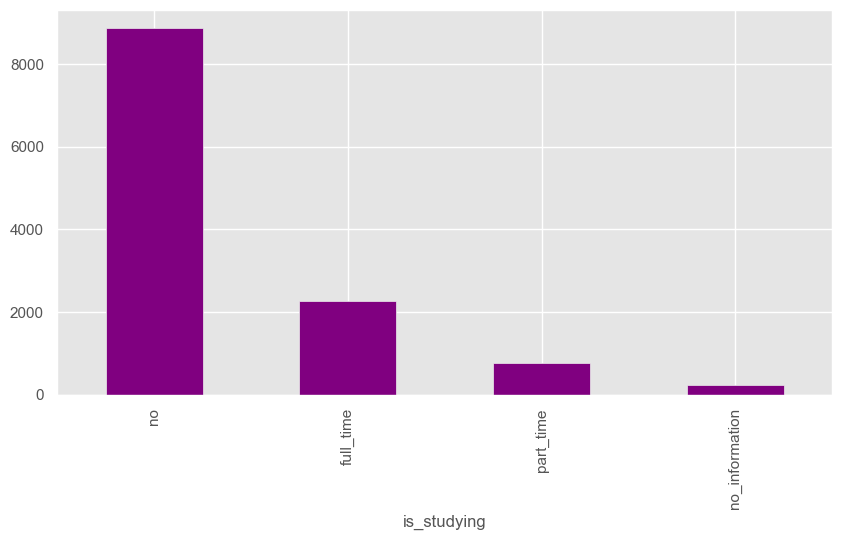

In [94]:
data['is_studying'].value_counts().plot(kind='bar', color='purple', figsize=(10, 5))

<Axes: >

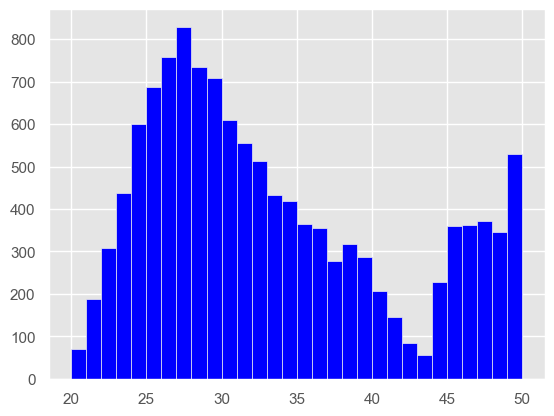

In [95]:
data['age'].hist(bins=30, color='blue')

we will try to handle the data of age by making groups for every 4 or 5 years 

   age age_group
0   22     20-25
1   27     26-30
2   38     36-40
3   47     46-50
4   28     26-30


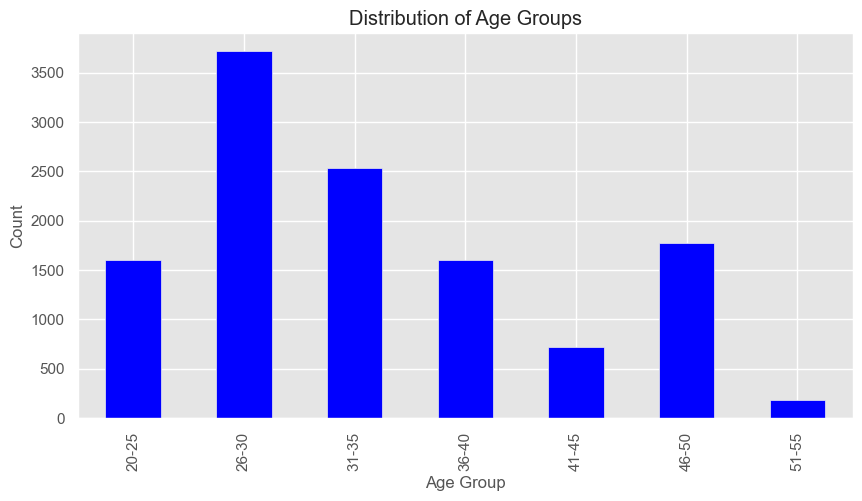

In [96]:
import pandas as pd

# Define bins and labels
bins = [20, 25, 30, 35, 40, 45, 50, 55]  
labels = ['20-25', '26-30', '31-35', '36-40', '41-45', '46-50', '51-55']

# Create a new column 'age_group' with the binned age values
data['age_group'] = pd.cut(data['age'], bins=bins, labels=labels, right=False)


print(data[['age', 'age_group']].head())


data['age_group'].value_counts().sort_index().plot(kind='bar', color='blue', figsize=(10, 5))
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.title('Distribution of Age Groups')
plt.show()

### Binning Age Data into Age Groups

#### Define Bins and Labels
The code snippet begins by defining bins and corresponding labels for categorizing age values into discrete age groups:
- `bins`: Specifies the boundaries for age groups, ranging from 20 to 55 in intervals of 5 (e.g., [20-25, 26-30, ..., 51-55]).
- `labels`: Defines the labels corresponding to each bin, representing age ranges (e.g., '20-25' for ages 20 to 25).

#### Creating 'age_group' Column
Using `pd.cut()`, a new column 'age_group' is created in the `data` DataFrame. This column categorizes each individual's age ('age' column) into one of the defined age groups based on the specified bins and labels.

#### Result Analysis
The code snippet prints the first few rows of the 'age' and 'age_group' columns to demonstrate how age values are grouped into their respective age groups:

<Axes: xlabel='is_studying'>

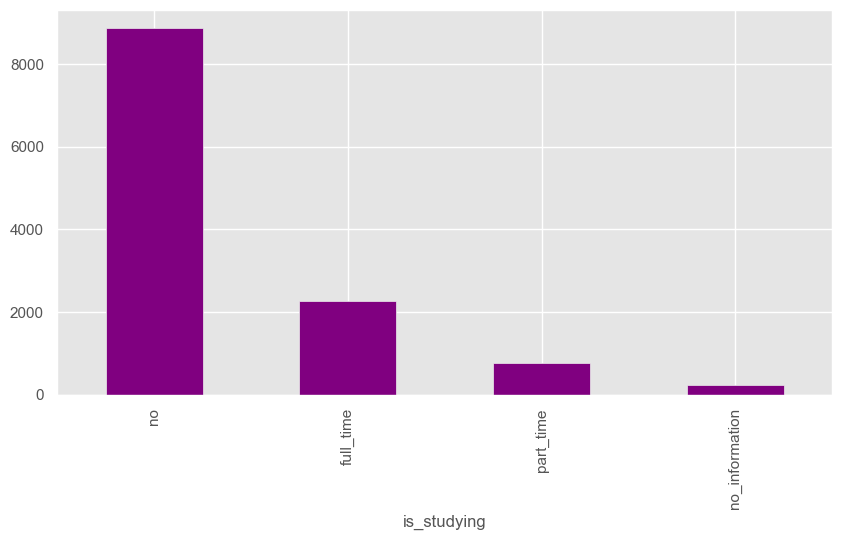

In [97]:
data['is_studying'].value_counts().plot(kind='bar', color='purple', figsize=(10, 5))

as we see here 'no_information' contributed with a small precentage in the above graph, which means we can remove them

Axes(0.125,0.11;0.775x0.77)


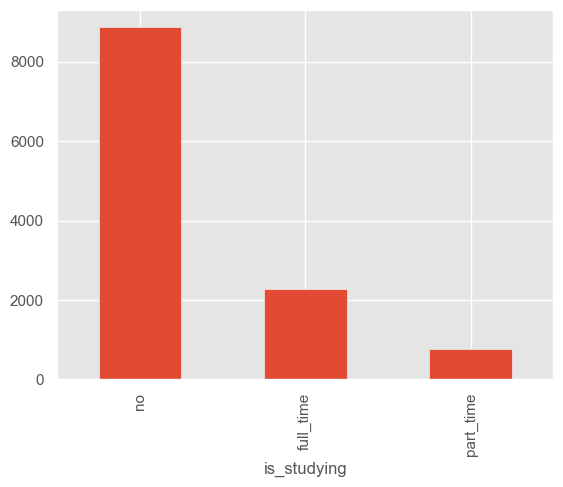

In [98]:
# Remove rows with 'Unknown' in 'is_studying' at the 'is_studying' column
data = data[data['is_studying'] != 'no_information']



# Verify the changes
print(data['is_studying'].value_counts().plot(kind='bar'))


In [99]:


# Define a mapping dictionary for 'is_studying' for the 'is_studying' column
mapping = {'no': 0, 'part_time': 1, 'full_time': 2,}

# Apply the mapping to create a new column
data['is_studying_mapped'] = data['is_studying'].map(mapping)

# Check the mapped values
print(data[['is_studying', 'is_studying_mapped']].value_counts())

is_studying  is_studying_mapped
no           0                     8865
full_time    2                     2271
part_time    1                      768
Name: count, dtype: int64


### Mapping 'is_studying' Column to Numerical Values

#### Mapping Dictionary Definition
The code snippet defines a mapping dictionary (`mapping`) to convert categorical values in the 'is_studying' column into numerical values:
- 'no' maps to 0
- 'part_time' maps to 1
- 'full_time' maps to 2

#### Applying the Mapping
The mapping is applied to the 'is_studying' column of the `data` DataFrame using the `.map()` function. This creates a new column 'is_studying_mapped' that replaces each categorical value with its corresponding numerical value based on the `mapping` dictionary.

#### Result Analysis
The code snippet prints the value counts of both 'is_studying' and 'is_studying_mapped' columns to show the distribution of mapped numerical values:

Text(0.5, 0, 'target 0')

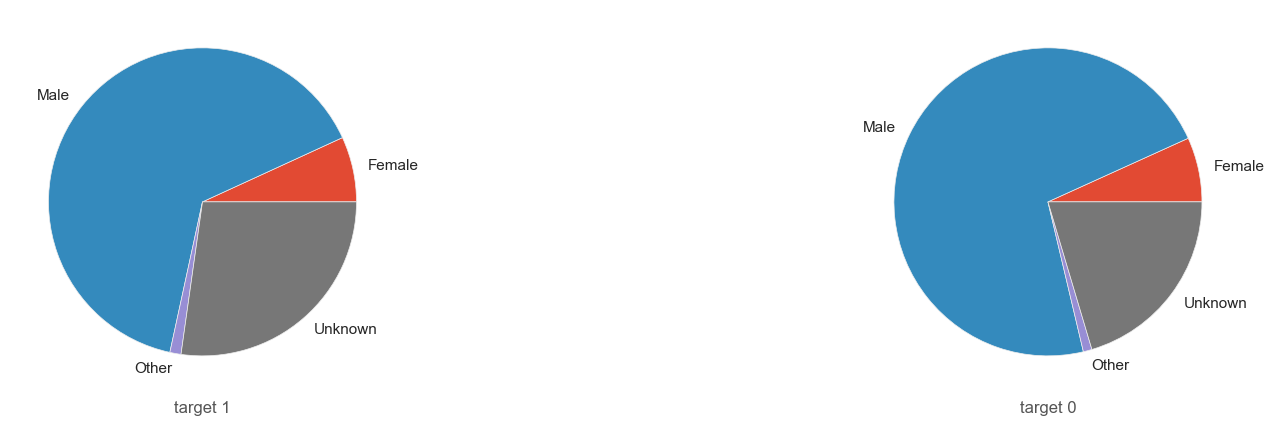

In [100]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(20, 5))
data.loc[data["willing_to_change_job"]==1, "gender"].reset_index().groupby("gender").size().plot(kind="pie", ax=ax1)
data.loc[data["willing_to_change_job"]==0, "gender"].reset_index().groupby("gender").size().plot(kind="pie", ax=ax2)

ax1.set_xlabel("target 1")
ax2.set_xlabel("target 0")

### Visualizing Distribution of Variables by Target

#### Code Explanation
The code snippet uses `matplotlib.pyplot` to create a figure (`fig`) with two subplots (`ax1` and `ax2`), arranged side by side (`ncols=2`). Each subplot has a specific purpose related to a target variable (`target 1` and `target 0`).

#### Plotting Pie Charts
1. **Left Subplot (`ax1`)**:
   - Filters data where the target variable is 1 (`target 1`).
   - Groups data by a categorical variable (e.g., gender).
   - Counts occurrences within each group and plots the distribution as a pie chart using `plot(kind="pie", ax=ax1)`.

2. **Right Subplot (`ax2`)**:
   - Filters data where the target variable is 0 (`target 0`).
   - Groups data by the same categorical variable (e.g., gender).
   - Counts occurrences within each group and plots the distribution as a pie chart using `plot(kind="pie", ax=ax2)`.

#### Customization
- **Labels**: Each subplot is labeled appropriately (`ax1.set_xlabel("target 1")`, `ax2.set_xlabel("target 0")`) to indicate which target value the pie chart represents.

#### Purpose
This visualization approach helps compare the distribution of different categorical variables between two target groups. It provides insights into potential correlations or patterns between categorical variables and the target variable, aiding in feature selection for modeling tasks. Similar visualizations can be generated for other categorical variables to further analyze their relevance in predicting the target variable.

Text(0.5, 0, 'target 0')

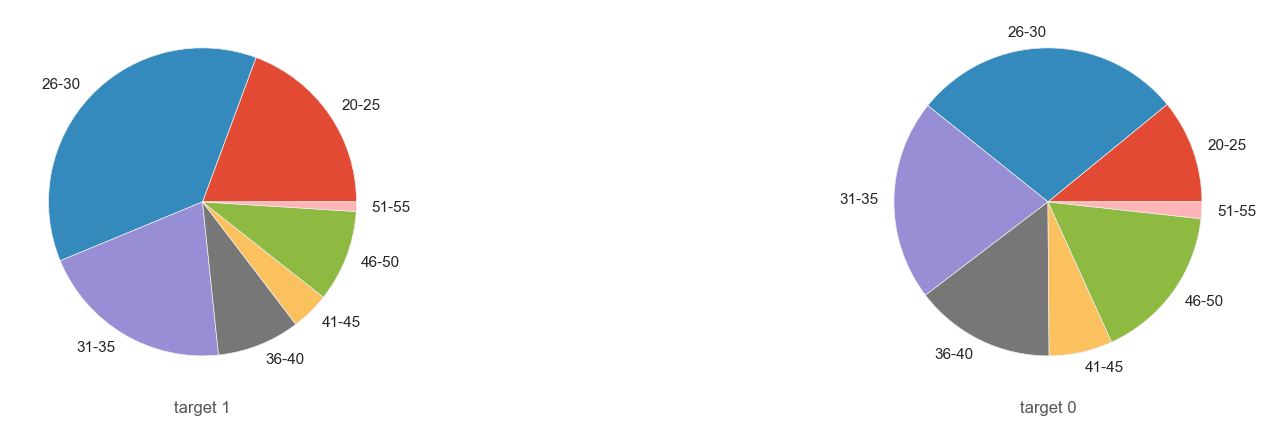

In [101]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(20, 5))
data.loc[data["willing_to_change_job"]==1, "age_group"].reset_index().groupby("age_group").size().plot(kind="pie", ax=ax1)
data.loc[data["willing_to_change_job"]==0, "age_group"].reset_index().groupby("age_group").size().plot(kind="pie", ax=ax2)

ax1.set_xlabel("target 1")
ax2.set_xlabel("target 0")

Text(0.5, 0, 'target 0')

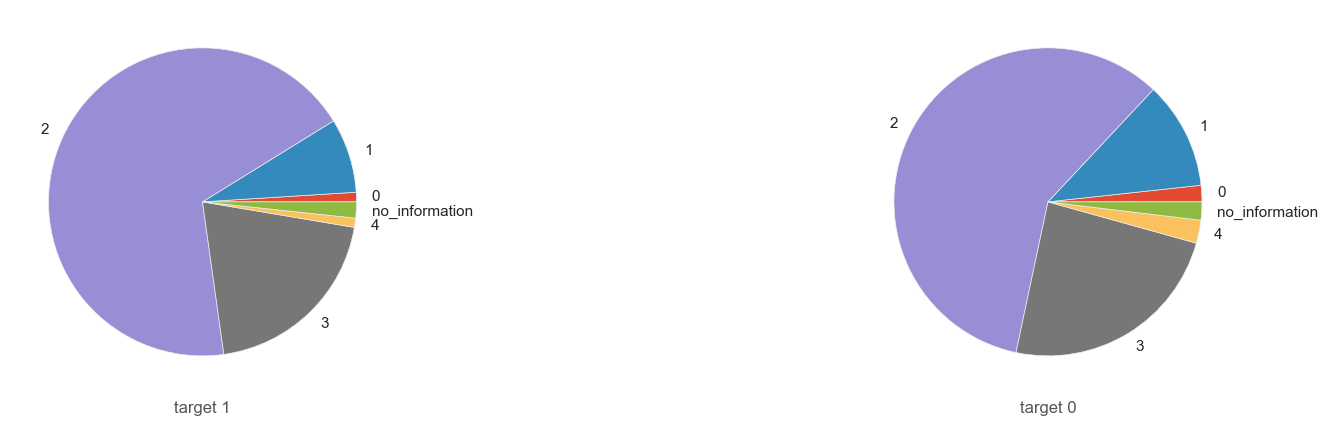

In [102]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(20, 5))
data.loc[data["willing_to_change_job"]==1, "education"].reset_index().groupby("education").size().plot(kind="pie", ax=ax1)
data.loc[data["willing_to_change_job"]==0, "education"].reset_index().groupby("education").size().plot(kind="pie", ax=ax2)

ax1.set_xlabel("target 1")
ax2.set_xlabel("target 0")

Text(0.5, 0, 'target 0')

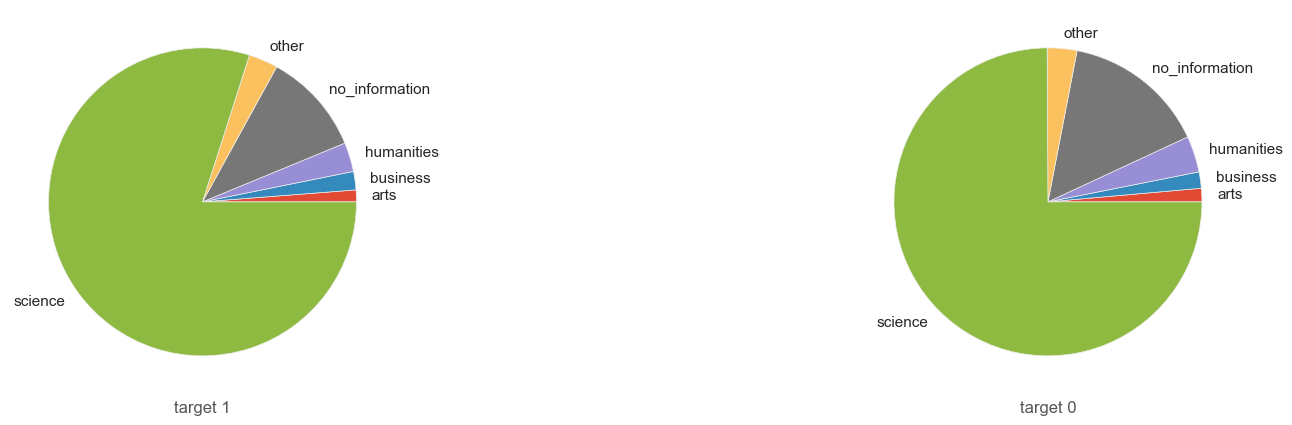

In [103]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(20, 5))
data.loc[data["willing_to_change_job"]==1, "field_of_studies"].reset_index().groupby("field_of_studies").size().plot(kind="pie", ax=ax1)
data.loc[data["willing_to_change_job"]==0, "field_of_studies"].reset_index().groupby("field_of_studies").size().plot(kind="pie", ax=ax2)

ax1.set_xlabel("target 1")
ax2.set_xlabel("target 0")

Text(0.5, 0, 'target 0')

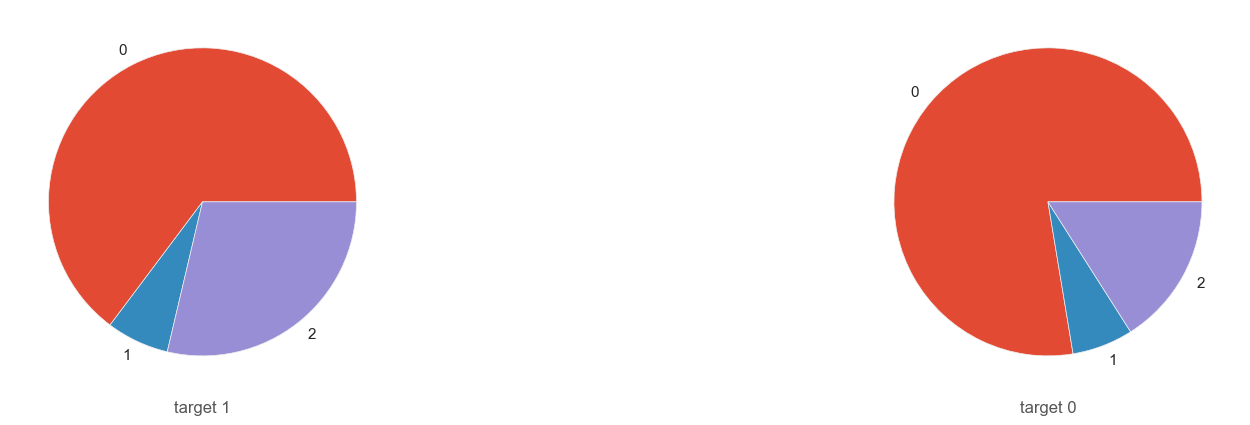

In [104]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(20, 5))
data.loc[data["willing_to_change_job"]==1, "is_studying_mapped"].reset_index().groupby("is_studying_mapped").size().plot(kind="pie", ax=ax1)
data.loc[data["willing_to_change_job"]==0, "is_studying_mapped"].reset_index().groupby("is_studying_mapped").size().plot(kind="pie", ax=ax2)

ax1.set_xlabel("target 1")
ax2.set_xlabel("target 0")

Text(0.5, 0, 'target 0')

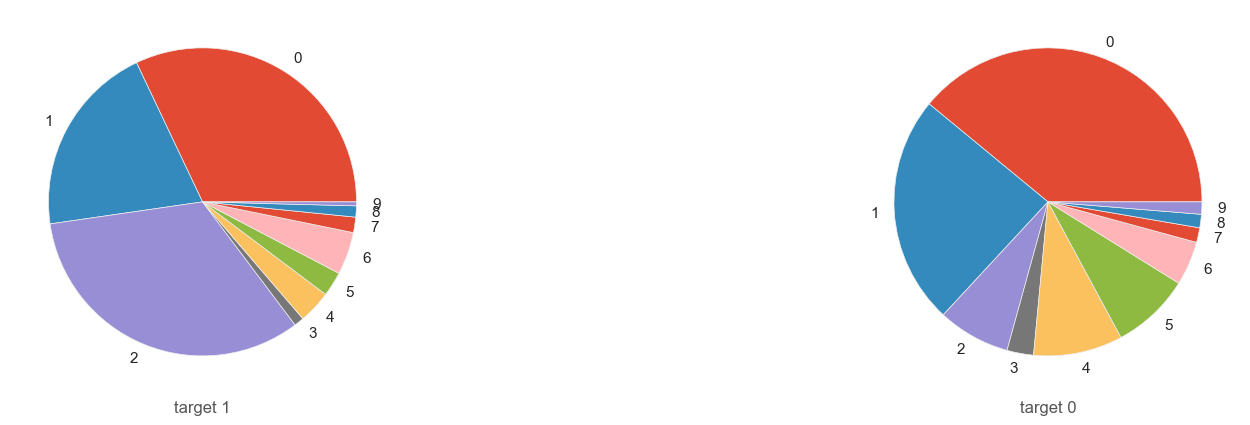

In [105]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(20, 5))
data.loc[data["willing_to_change_job"]==1, "county_cluster"].reset_index().groupby("county_cluster").size().plot(kind="pie", ax=ax1)
data.loc[data["willing_to_change_job"]==0, "county_cluster"].reset_index().groupby("county_cluster").size().plot(kind="pie", ax=ax2)

ax1.set_xlabel("target 1")
ax2.set_xlabel("target 0")

Text(0.5, 0, 'target 0')

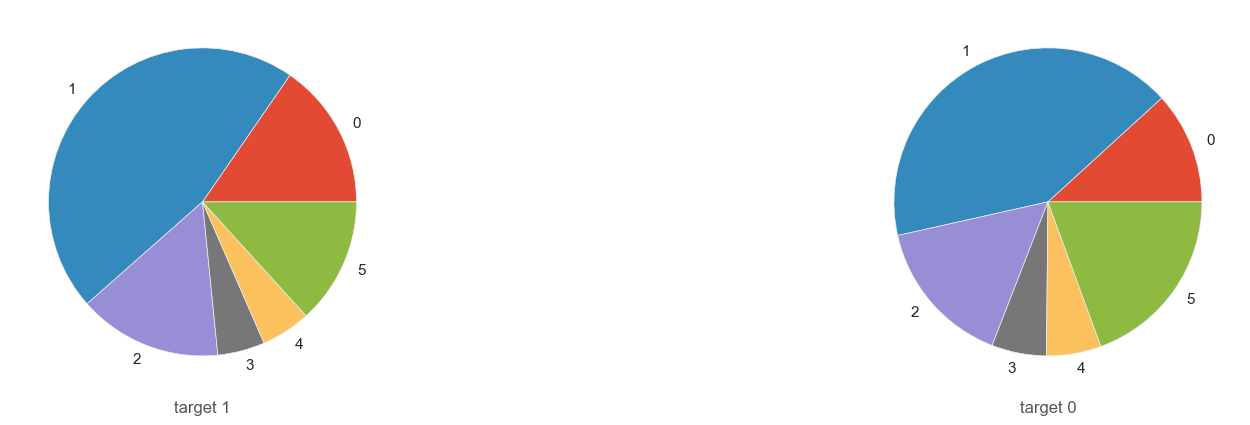

In [106]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(20, 5))
data.loc[data["willing_to_change_job"]==1, "years_since_job_change"].reset_index().groupby("years_since_job_change").size().plot(kind="pie", ax=ax1)
data.loc[data["willing_to_change_job"]==0, "years_since_job_change"].reset_index().groupby("years_since_job_change").size().plot(kind="pie", ax=ax2)

ax1.set_xlabel("target 1")
ax2.set_xlabel("target 0")

Text(0.5, 0, 'target 0')

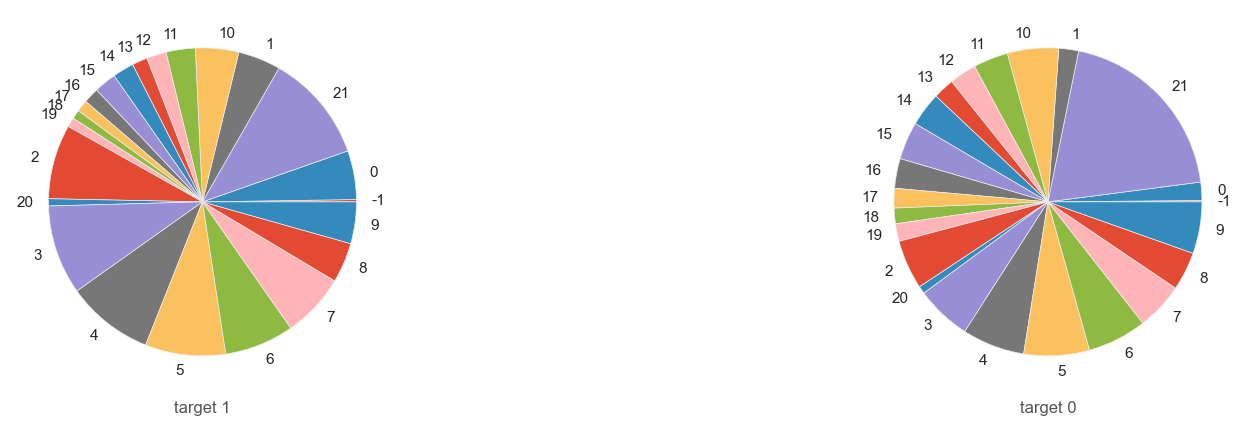

In [107]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(20, 5))
data.loc[data["willing_to_change_job"]==1, "years_of_experience"].reset_index().groupby("years_of_experience").size().plot(kind="pie", ax=ax1)
data.loc[data["willing_to_change_job"]==0, "years_of_experience"].reset_index().groupby("years_of_experience").size().plot(kind="pie", ax=ax2)

ax1.set_xlabel("target 1")
ax2.set_xlabel("target 0")

Text(0.5, 0, 'target 0')

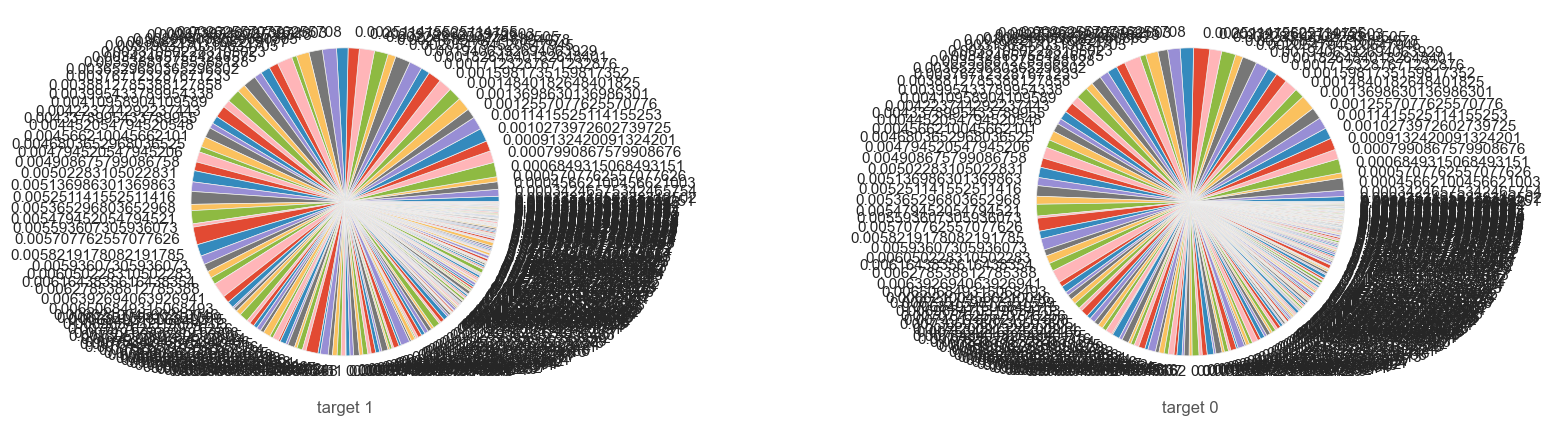

In [108]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(20, 5))
data.loc[data["willing_to_change_job"]==1, "years_of_training"].reset_index().groupby("years_of_training").size().plot(kind="pie", ax=ax1)
data.loc[data["willing_to_change_job"]==0, "years_of_training"].reset_index().groupby("years_of_training").size().plot(kind="pie", ax=ax2)

ax1.set_xlabel("target 1")
ax2.set_xlabel("target 0")

Text(0.5, 0, 'target 0')

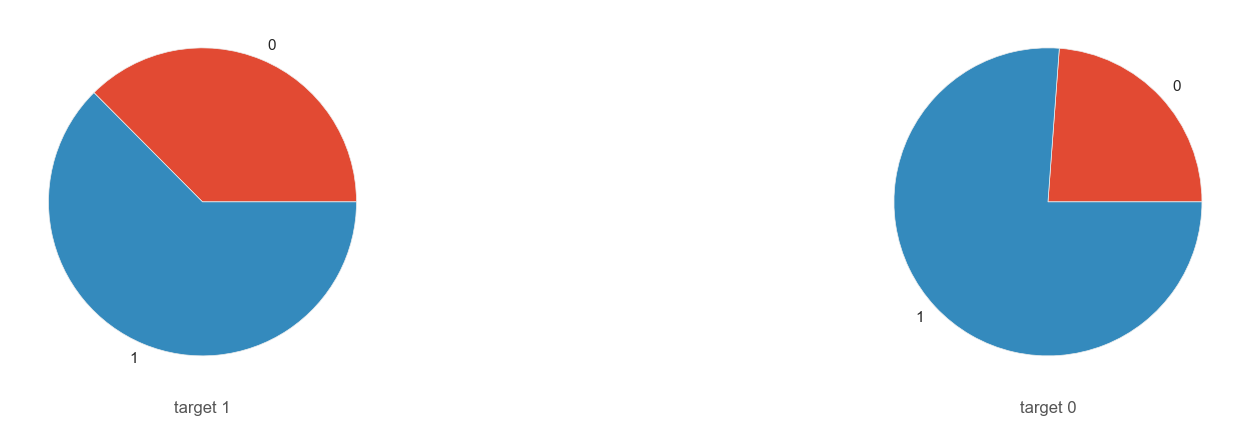

In [109]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(20, 5))
data.loc[data["willing_to_change_job"]==1, "is_certified"].reset_index().groupby("is_certified").size().plot(kind="pie", ax=ax1)
data.loc[data["willing_to_change_job"]==0, "is_certified"].reset_index().groupby("is_certified").size().plot(kind="pie", ax=ax2)

ax1.set_xlabel("target 1")
ax2.set_xlabel("target 0")

Text(0.5, 0, 'target 0')

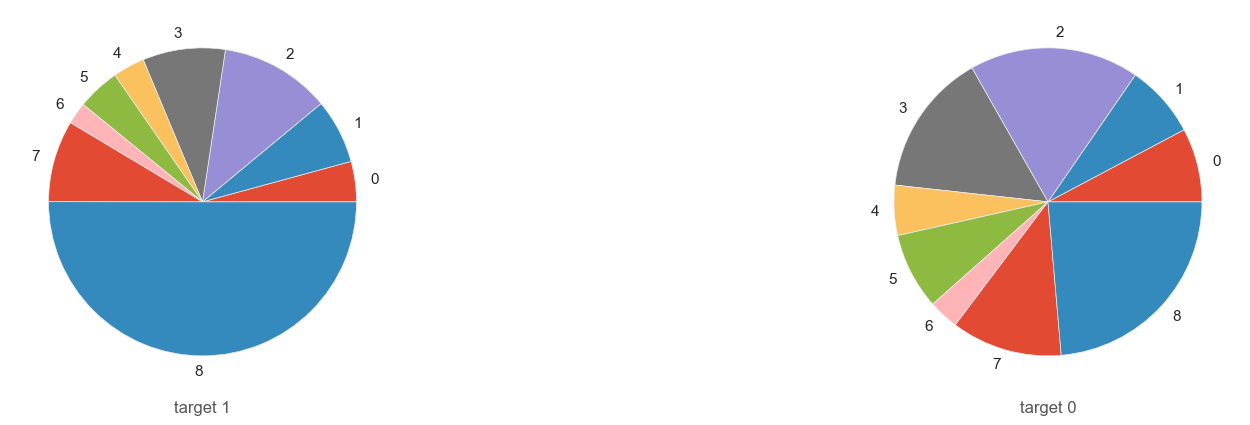

In [110]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(20, 5))
data.loc[data["willing_to_change_job"]==1, "size_of_company"].reset_index().groupby("size_of_company").size().plot(kind="pie", ax=ax1)
data.loc[data["willing_to_change_job"]==0, "size_of_company"].reset_index().groupby("size_of_company").size().plot(kind="pie", ax=ax2)

ax1.set_xlabel("target 1")
ax2.set_xlabel("target 0")

Text(0.5, 0, 'target 0')

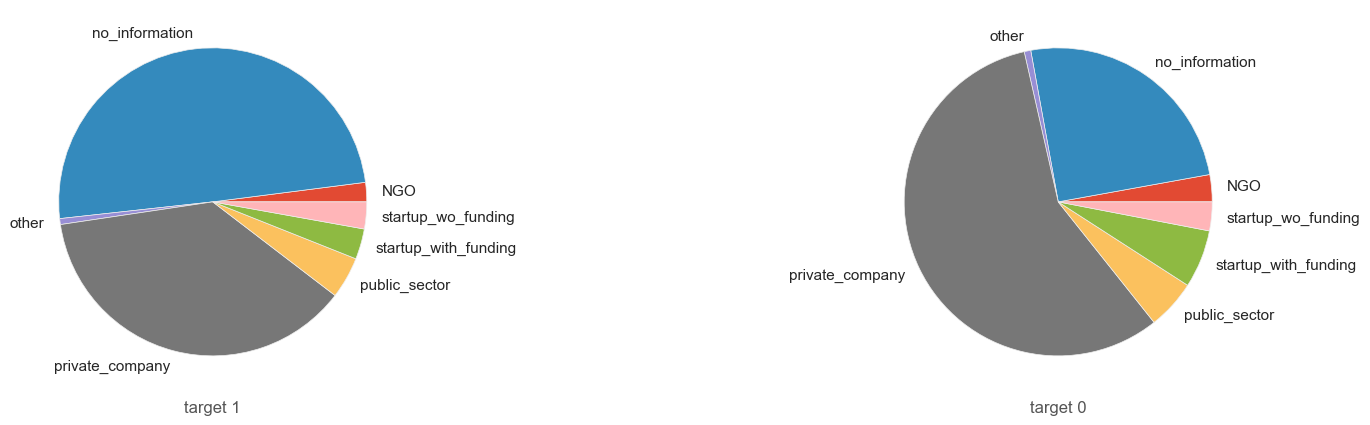

In [111]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(20, 5))
data.loc[data["willing_to_change_job"]==1, "type_of_company"].reset_index().groupby("type_of_company").size().plot(kind="pie", ax=ax1)
data.loc[data["willing_to_change_job"]==0, "type_of_company"].reset_index().groupby("type_of_company").size().plot(kind="pie", ax=ax2)

ax1.set_xlabel("target 1")
ax2.set_xlabel("target 0")

Text(0.5, 0, 'target 0')

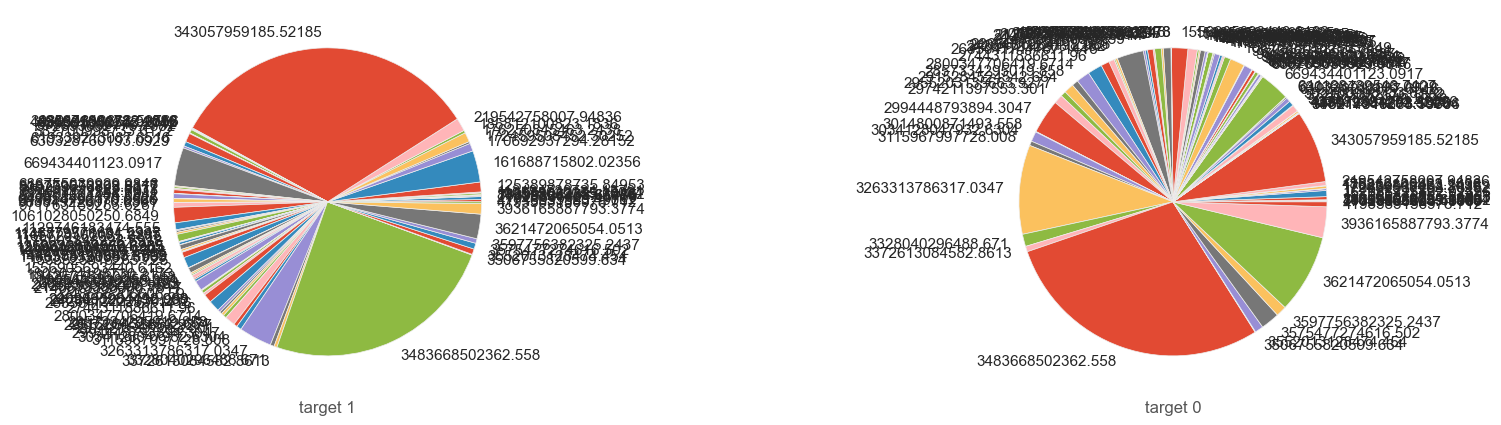

In [112]:


# Your existing code
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(20, 5))
data.loc[data["willing_to_change_job"]==1, "relative_wage_boxcox"].reset_index().groupby("relative_wage_boxcox").size().plot(kind="pie", ax=ax1)
data.loc[data["willing_to_change_job"]==0, "relative_wage_boxcox"].reset_index().groupby("relative_wage_boxcox").size().plot(kind="pie", ax=ax2)

ax1.set_xlabel("target 1")
ax2.set_xlabel("target 0")

age_group
is_studying_mapped
county_cluster
years_of_experience
is_certified
size_of_company
type_of_company
wage group


In [113]:

from scipy.stats import pointbiserialr, spearmanr


# Assuming 'willing_to_change_job' is binary (0 or 1)
target = 'willing_to_change_job'
correlation_results = {}

# Helper function to convert non-numeric columns to numeric
def convert_to_numeric(series):
    if series.dtype in [np.int64, np.float64]:
        return series
    else:
        return series.astype('category').cat.codes

# Calculate point-biserial correlation for binary target variables with continuous predictors
for column in data.columns:
    if column != target:
        if data[column].dtype in [np.int64, np.float64]:
            correlation, _ = pointbiserialr(data[target], data[column])
            correlation_results[column] = correlation
        else:
            # Convert non-numeric columns to numeric for Spearman correlation
            converted_column = convert_to_numeric(data[column])
            correlation, _ = spearmanr(data[target], converted_column)
            correlation_results[column] = correlation

# Convert the results to a DataFrame for better visualization
correlation_df = pd.DataFrame.from_dict(correlation_results, orient='index', columns=['Correlation'])
correlation_df = correlation_df.sort_values(by='Correlation', ascending=False)

# Display the DataFrame
correlation_df

,Correlation
size_of_company,0.191535
is_studying_mapped,0.138428
gender,0.060922
years_of_experience,0.056825
field_of_studies,0.049353
county_cluster,0.025278
id,-0.001342
years_of_training,-0.014649
hours_of_training,-0.014649
education,-0.017042


### Analyzing Correlation Between Target Variable and Predictors

#### Code Explanation
The code snippet calculates correlations between a binary target variable ('willing_to_change_job') and other predictors in the dataset using two different methods:
- **Point-biserial correlation** for binary target with continuous predictors.
- **Spearman correlation** for binary target with categorical predictors converted to numeric.

#### Steps:
1. **Importing Libraries**: The snippet imports necessary functions (`pointbiserialr` and `spearmanr`) from `scipy.stats`.

2. **Setting Up**: Defines the target variable (`target`) and initializes an empty dictionary (`correlation_results`) to store correlation coefficients.

3. **Helper Function**: `convert_to_numeric()` function converts non-numeric columns to numeric using categorical encoding for Spearman correlation.

4. **Correlation Calculation**: Iterates through each column in the dataset (`data.columns`), excluding the target variable:
   - Calculates point-biserial correlation if the column is numeric.
   - Converts non-numeric columns and calculates Spearman correlation for categorical predictors.
   - Stores the correlation coefficient in `correlation_results`.

5. **DataFrame Creation**: Converts `correlation_results` dictionary to a DataFrame (`correlation_df`) for better visualization, sorted by correlation coefficient in descending order.

6. **Displaying Results**: Displays the DataFrame (`correlation_df`) showing the correlation coefficients between the target variable and each predictor.

#### Interpretation
- Positive correlations (e.g., `size_of_company`, `is_studying_mapped`) indicate that higher values in these predictors tend to be associated with a higher likelihood of the target variable being 1 (willing to change job).
- Negative correlations (e.g., `relative_wage`, `age_group`) suggest that higher values in these predictors tend to be associated with a lower likelihood of the target variable being 1.
- The magnitude of correlation coefficients (`Correlation` column) indicates the strength and direction of the relationship between each predictor and the target variable.

#### Conclusion
This approach systematically evaluates the relationship between predictors and the target variable using correlation coefficients. It helps identify influential predictors that may be relevant for predicting or understanding the likelihood of individuals being willing to change jobs. These insights can guide feature selection and model building in predictive analytics tasks.

In [114]:
app_train_selected = data[['willing_to_change_job','is_studying_mapped','is_certified','size_of_company', 'type_of_company', 'relative_wage', 'county_cluster','years_of_experience', 'age_group','field_of_studies']]

### Selecting Variables for the Predictive Model

#### Variables Chosen
The code snippet selects specific variables from the `data` DataFrame to be used in a predictive model (`app_train_selected`):
- `willing_to_change_job`: The target variable indicating whether an individual is willing to change jobs (binary).
- `is_studying_mapped`: Numeric representation of studying status (converted from categorical).
- `is_certified`: Binary indicator of certification status.
- `size_of_company`: Ordinal variable representing company size.
- `type_of_company`: Categorical variable indicating the type of company.
- `relative_wage`: Numerical variable representing relative wage.
- `county_cluster`: Categorical variable identifying the cluster of counties.
- `years_of_experience`: Numerical variable representing years of work experience.
- `age_group`: Categorical variable representing age groups.
- `field_of_studies`: Categorical variable indicating the field of studies.

#### Purpose
- **Predictive Modeling**: These variables are selected based on their potential influence or relevance to predicting whether an individual is willing to change jobs (`willing_to_change_job`).
- **Feature Selection**: Variables like `size_of_company`, `relative_wage`, `years_of_experience`, and `age_group` are commonly considered influential in job-related decisions, while `is_studying_mapped`, `is_certified`, `type_of_company`, `county_cluster​⬤

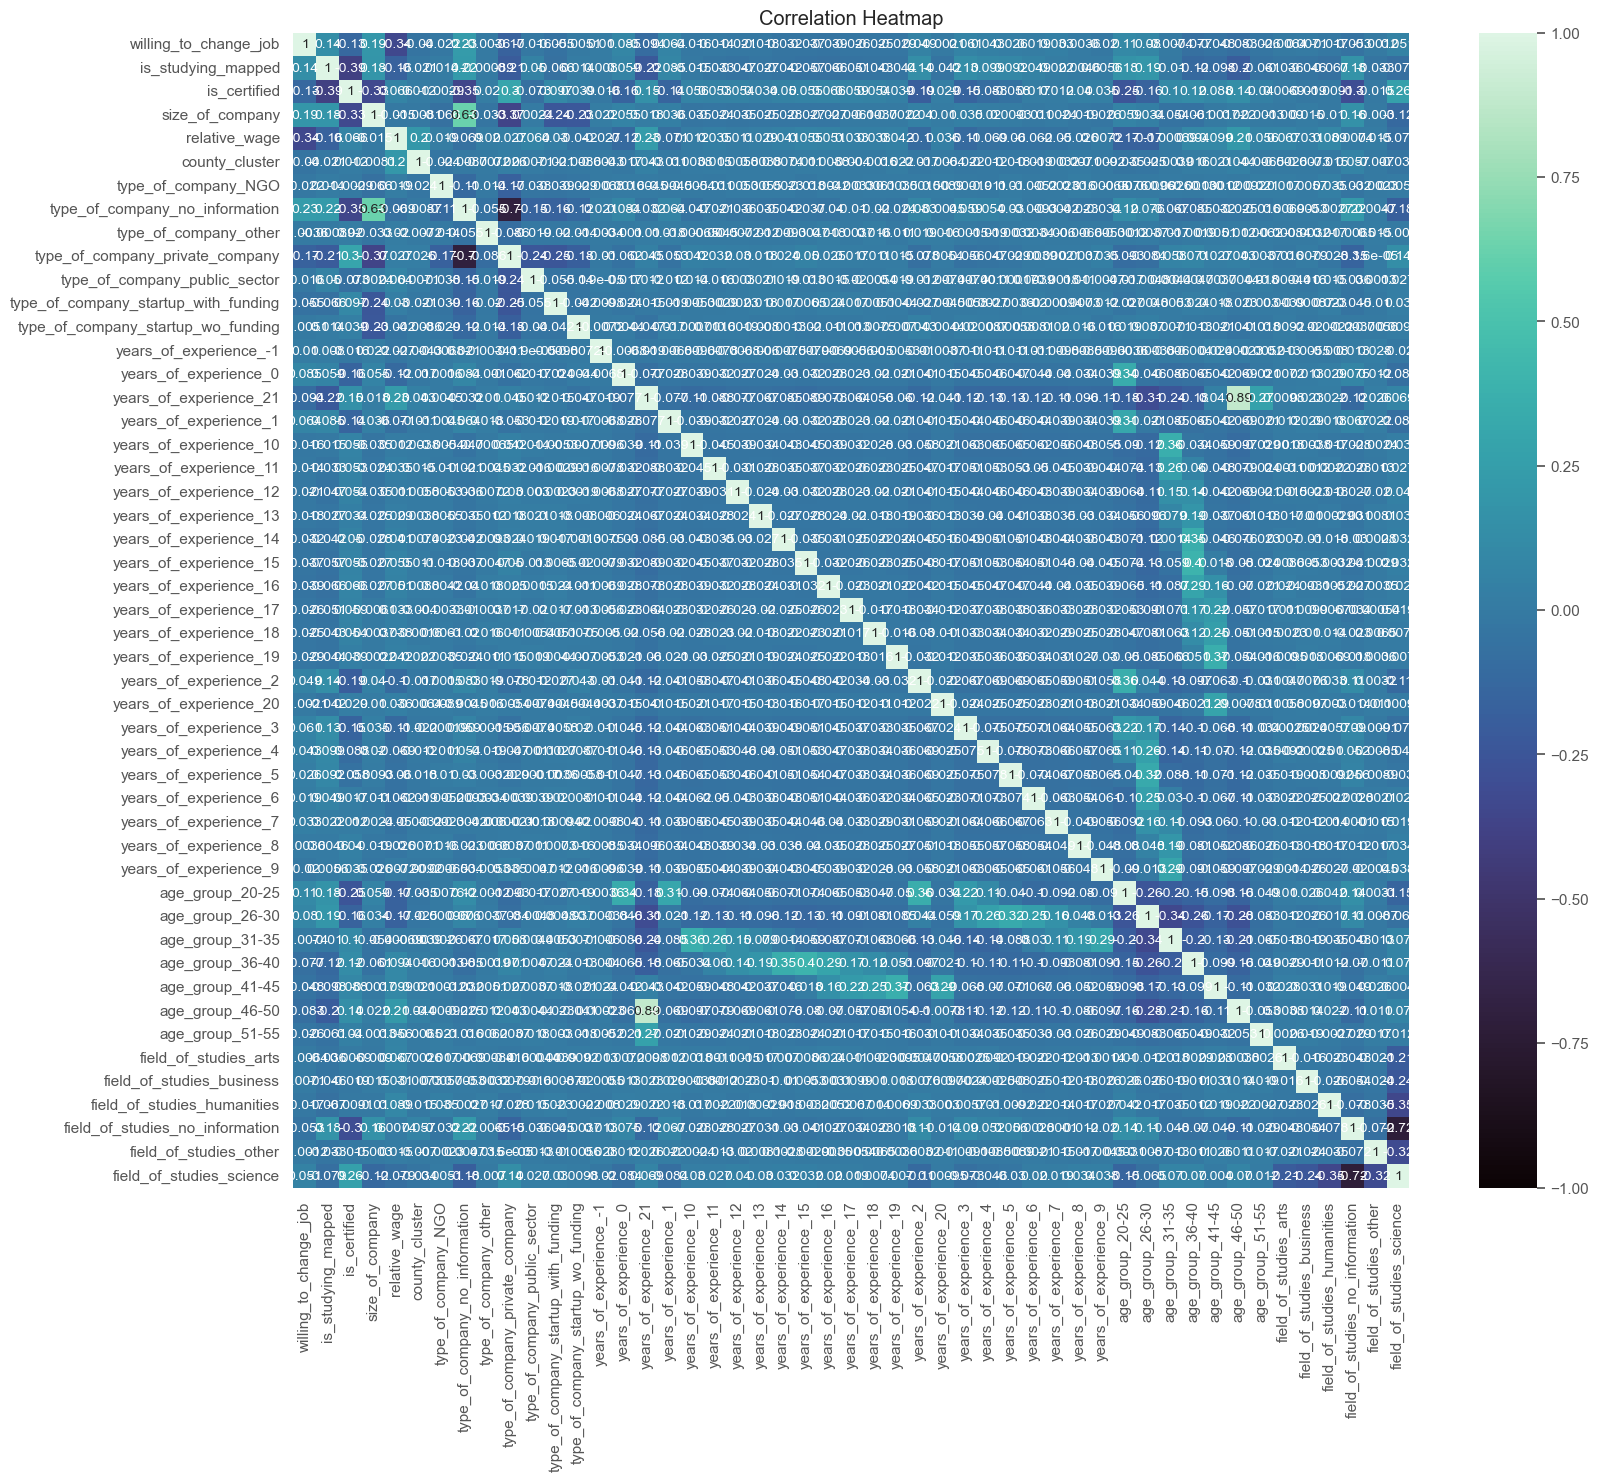

In [115]:
data_encoded = pd.get_dummies(app_train_selected)

# Calculate correlation matrix
corr = data_encoded.corr()

# Plot correlation heatmap
plt.figure(figsize=(18, 15))
sns.heatmap(corr, annot=True, vmin=-1.0, cmap='mako')
plt.title('Correlation Heatmap')
plt.show()

In [116]:
app_train_selected.info()   

<class 'pandas.core.frame.DataFrame'>
Index: 11904 entries, 0 to 12426
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   willing_to_change_job  11904 non-null  int64   
 1   is_studying_mapped     11904 non-null  int64   
 2   is_certified           11904 non-null  int64   
 3   size_of_company        11904 non-null  int64   
 4   type_of_company        11904 non-null  object  
 5   relative_wage          11904 non-null  float64 
 6   county_cluster         11904 non-null  int32   
 7   years_of_experience    11904 non-null  object  
 8   age_group              11904 non-null  category
 9   field_of_studies       11904 non-null  object  
dtypes: category(1), float64(1), int32(1), int64(4), object(3)
memory usage: 895.5+ KB


In [117]:
#Create dummies/one-hot encoding on every nominal attributes in train dataframe
Dummy_type = pd.get_dummies(app_train_selected['type_of_company'],prefix='type_of_company')
Dummy_study = pd.get_dummies(app_train_selected['field_of_studies'],prefix='field_of_studies')
Dummy_country = pd.get_dummies(app_train_selected['county_cluster'],prefix='county_cluster')
Dummy_age = pd.get_dummies(app_train_selected['age_group'],prefix='age_group')


### Creating Dummy Variables/One-Hot Encoding

#### Nominal Attributes Processed
The code snippet performs one-hot encoding on several nominal attributes from the `app_train_selected` DataFrame:
- **`type_of_company`**: Categorical variable indicating the type of company.
- **`field_of_studies`**: Categorical variable indicating the field of studies.
- **`county_cluster`**: Categorical variable identifying the cluster of counties.
- **`age_group`**: Categorical variable representing age groups.

#### Process Explanation
- **`pd.get_dummies()` Function**: Utilizes Pandas' `get_dummies()` function to convert each categorical attribute into a set of dummy variables.
  - Parameters such as `prefix` are used to prefix column names for clarity and distinction after encoding.

#### Resulting DataFrames
- **`Dummy_type`**: DataFrame containing dummy variables for `type_of_company`.
- **`Dummy_study`**: DataFrame containing dummy variables for `field_of_studies`.
- **`Dummy_country`**: DataFrame containing dummy variables for `county_cluster`.
- **`Dummy_age`**: DataFrame containing dummy variables for `age_group`.

#### Purpose
One-hot encoding transforms categorical data into a format suitable for machine learning models that require numerical inputs. This preprocessing step ensures that categorical attributes are appropriately represented without ordinality assumptions, enabling accurate modeling and analysis based on categorical variables.

#### Conclusion
Creating dummy variables or performing one-hot encoding on nominal attributes prepares the data for predictive modeling tasks. These encoded features capture categorical distinctions effectively, facilitating meaningful insights and accurate predictions in machine learning applications.

In [118]:
#Concate the dummies into train dataset
app_train_selected = pd.concat([app_train_selected, Dummy_country,Dummy_age, Dummy_type, Dummy_study], axis=1)

#Drop categorical attribute (before transformation)
app_train_selected = app_train_selected.drop(['type_of_company','county_cluster', 'age_group', 'field_of_studies'], axis=1)


### Concatenating Dummy Variables into Train Dataset

#### Concatenation Process
The code snippet concatenates dummy variables for categorical attributes (`county_cluster`, `age_group`, `type_of_company`, `field_of_studies`) into `app_train_selected`.

#### Dropping Original Categorical Attributes
Original categorical attributes are dropped post-transformation to maintain a numerical dataset suitable for machine learning.

#### Purpose
This preprocessing step prepares categorical data for modeling by encoding them into numerical format, facilitating accurate predictions.

#### Conclusion
Concatenating dummy variables enhances the dataset with additional features capturing categorical distinctions, crucial for predictive modeling tasks.

In [119]:
app_train_selected.head()

,willing_to_change_job,is_studying_mapped,is_certified,size_of_company,relative_wage,years_of_experience,county_cluster_0,county_cluster_1,county_cluster_2,county_cluster_3,...,type_of_company_private_company,type_of_company_public_sector,type_of_company_startup_with_funding,type_of_company_startup_wo_funding,field_of_studies_arts,field_of_studies_business,field_of_studies_humanities,field_of_studies_no_information,field_of_studies_other,field_of_studies_science
0,0,0,1,0,162.84,2,False,True,False,False,...,True,False,False,False,False,False,False,False,False,True
1,0,0,1,2,151.34,6,False,False,False,True,...,True,False,False,False,False,False,False,False,False,True
2,0,0,1,2,114.17,13,True,False,False,False,...,False,False,True,False,False,False,False,False,False,True
3,0,0,1,3,123.55,21,True,False,False,False,...,True,False,False,False,False,False,False,False,False,True
4,0,0,1,5,162.84,5,False,True,False,False,...,True,False,False,False,False,False,False,False,False,True


In [120]:
import pandas as pd
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler
from sklearn.preprocessing import StandardScaler

# by Aconsidering'app_train_selected' our DataFrame
# Separate features (X) and target (y)
X = app_train_selected.drop(columns=['willing_to_change_job'])
y = app_train_selected['willing_to_change_job']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/3, random_state=42, stratify=y)

# Apply Random Oversampler to the training data
ros = RandomOverSampler(random_state=42)
X_res, y_res = ros.fit_resample(X_train, y_train)

# Standardize the features
scaler = StandardScaler()
X_res_scaled = scaler.fit_transform(X_res)
X_test_scaled = scaler.transform(X_test)

print("Class distribution after oversampling:", y_res.value_counts())

Class distribution after oversampling: willing_to_change_job
0    5999
1    5999
Name: count, dtype: int64


### Data Preparation for Modeling

#### Data Splitting and Resampling
The code prepares data (`X` and `y`) for modeling:
- **Split**: Splits data into training and testing sets (`X_train`, `X_test`, `y_train`, `y_test`).
- **Oversampling**: Applies Random Oversampling to balance classes in training data (`X_res`, `y_res`).
- **Standardization**: Standardizes features using `StandardScaler` for improved model performance.

#### Result
Prints the class distribution after oversampling to show balanced classes:

as we obseved before that we have unbalance values in the target variable so we decided to choose Random Oversampler method

In [121]:

# Initialize and train the Gradient Boosting model
gb = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gb.fit(X_res, y_res)

# Make predictions on the test set
y_pred1 = gb.predict(X_test)

# Calculate balanced accuracy
balanced_acc1 = balanced_accuracy_score(y_test, y_pred1)
print(f"Balanced Accuracy: {balanced_acc1 * 100:.2f} %")

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred1))

Balanced Accuracy: 76.33 %
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.78      0.84      3000
           1       0.52      0.74      0.62       968

    accuracy                           0.77      3968
   macro avg       0.71      0.76      0.73      3968
weighted avg       0.81      0.77      0.78      3968



### Gradient Boosting Classifier Results

#### Model Training and Evaluation
The code snippet trains a Gradient Boosting classifier (`gb`) with specified parameters:
- **Training**: Fits the model on resampled training data (`X_res`, `y_res`).
- **Prediction**: Predicts target values (`y_pred1`) on the test set (`X_test`).
- **Evaluation Metrics**:
  - **Balanced Accuracy**: Computes and prints the balanced accuracy score.
    ```
    Balanced Accuracy: 76.33 %
    ```
  - **Classification Report**: Generates and displays the classification report showing precision, recall, and F1-score for each class.
    ```
    Classification Report:
                  precision    recall  f1-score   support

               0       0.90      0.78      0.84      3000
               1       0.52      0.74      0.62       968

        accuracy                           0.77      3968
       macro avg       0.71      0.76      0.73      3968
    weighted avg       0.81      0.77      0.78      3968
    ```

#### Summary
The Gradient Boosting model achieves a balanced accuracy of 76.33%, indicating its effectiveness in predicting both classes. The classification report provides insights into model performance metrics across precision, recall, and F1-score for each class, highlighting areas where the model performs well and where it can be improved.

In [122]:



# Initialize and train the XGBoost model
import xgboost as xgb
# Convert "years_of_experience" column to categorical type
X_res['years_of_experience'] = X_res['years_of_experience'].astype('category')
X_test['years_of_experience'] = X_test['years_of_experience'].astype('category')

# Initialize and train the XGBoost model with enable_categorical=True
xgb = XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42, use_label_encoder=False, eval_metric='logloss', enable_categorical=True)
xgb.fit(X_res, y_res)

# Make predictions on the test set
y_pred2 = xgb.predict(X_test)

# Calculate balanced accuracy
balanced_acc2 = balanced_accuracy_score(y_test, y_pred2)
print(f"Balanced Accuracy: {balanced_acc2 * 100:.2f} %")

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred2))

Balanced Accuracy: 75.83 %
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.78      0.84      3000
           1       0.52      0.74      0.61       968

    accuracy                           0.77      3968
   macro avg       0.71      0.76      0.72      3968
weighted avg       0.81      0.77      0.78      3968



In [123]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import balanced_accuracy_score, classification_report

# Initialize and train the Decision Tree model
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_res, y_res)

# Make predictions on the test set
y_pred_dt = dt.predict(X_test)

# Calculate balanced accuracy
balanced_acc_dt = balanced_accuracy_score(y_test, y_pred_dt)
print(f"Balanced Accuracy: {balanced_acc_dt * 100:.2f} %")

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred_dt))

Balanced Accuracy: 65.76 %
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.80      0.82      3000
           1       0.45      0.52      0.48       968

    accuracy                           0.73      3968
   macro avg       0.64      0.66      0.65      3968
weighted avg       0.74      0.73      0.73      3968



In [124]:
from sklearn.ensemble import RandomForestClassifier

# Initialize and train the Random Forest model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_res, y_res)

# Make predictions on the test set
y_pred_rf = rf.predict(X_test)

# Calculate balanced accuracy
balanced_acc_rf = balanced_accuracy_score(y_test, y_pred_rf)
print(f"Balanced Accuracy: {balanced_acc_rf * 100:.2f} %")

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred_rf))

Balanced Accuracy: 69.19 %
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.83      0.84      3000
           1       0.51      0.56      0.53       968

    accuracy                           0.76      3968
   macro avg       0.68      0.69      0.69      3968
weighted avg       0.77      0.76      0.76      3968



In [125]:



# Initialize and train the SVM model
svm = SVC(kernel='linear', random_state=42, probability=True)
svm.fit(X_res, y_res)

# Make predictions on the test set
y_pred3 = svm.predict(X_test)

# Calculate balanced accuracy
balanced_acc3 = balanced_accuracy_score(y_test, y_pred3)
print(f"Balanced Accuracy: {balanced_acc3 * 100:.2f} %")

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred3))

Balanced Accuracy: 73.97 %
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.73      0.80      3000
           1       0.47      0.75      0.58       968

    accuracy                           0.73      3968
   macro avg       0.69      0.74      0.69      3968
weighted avg       0.80      0.73      0.75      3968



In [126]:


# Initialize and train the Logistic Regression model
lr = LogisticRegression(random_state=42)
lr.fit(X_res, y_res)

# Make predictions on the test set
y_pred4 = lr.predict(X_test)

# Calculate balanced accuracy
balanced_acc4 = balanced_accuracy_score(y_test, y_pred4)
print(f"Balanced Accuracy: {balanced_acc4 * 100:.2f} %")

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred4))

Balanced Accuracy: 74.35 %
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.76      0.82      3000
           1       0.49      0.73      0.59       968

    accuracy                           0.75      3968
   macro avg       0.70      0.74      0.71      3968
weighted avg       0.80      0.75      0.77      3968



In [127]:

# Initialize and train the KNN model
knn = KNeighborsClassifier(n_neighbors=5)  # You can adjust the number of neighbors
knn.fit(X_res, y_res)

# Make predictions on the test set
y_pred5 = knn.predict(X_test)

# Calculate balanced accuracy
balanced_acc5 = balanced_accuracy_score(y_test, y_pred5)
print(f"Balanced Accuracy: {balanced_acc5 * 100:.2f} %")

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred5))

Balanced Accuracy: 67.58 %
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.75      0.80      3000
           1       0.44      0.60      0.51       968

    accuracy                           0.71      3968
   macro avg       0.64      0.68      0.65      3968
weighted avg       0.75      0.71      0.73      3968



AUC: 0.80


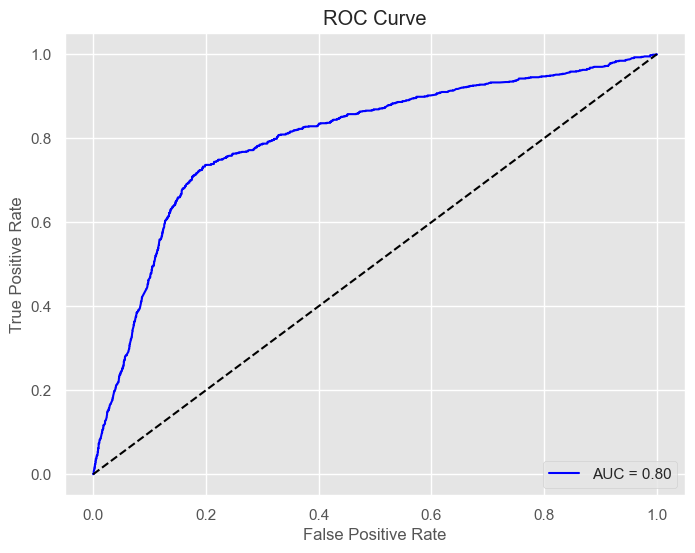

In [128]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

# Get the probabilities for the positive class
y_prob4 = gb.predict_proba(X_test)[:, 1]

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob4)

# Calculate AUC
auc = roc_auc_score(y_test, y_prob4)
print(f"AUC: {auc:.2f}")

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}', color='blue')
plt.plot([0, 1], [0, 1], linestyle='--', color='black')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

### Receiver Operating Characteristic (ROC) Curve and AUC

#### ROC Curve Analysis
The code snippet computes and visualizes the ROC curve and AUC (Area Under the Curve) for a Gradient Boosting classifier (`gb`):
- **Probability Prediction**: Calculates probabilities (`y_prob4`) for the positive class from the test set.
- **ROC Curve**: Computes the ROC curve (`fpr`, `tpr`, `thresholds`) using `roc_curve` from `sklearn.metrics`.
- **AUC Calculation**: Computes the AUC score (`auc`) using `roc_auc_score` from `sklearn.metrics`.

#### Plotting ROC Curve
- Plots the ROC curve with AUC value labeled (`AUC = 0.80`), alongside a diagonal line indicating random guessing.
- Axes labels (`False Positive Rate` and `True Positive Rate`), title (`ROC Curve`), and legend (`AUC = 0.80`) are added for clarity.

#### Conclusion
The ROC curve and AUC provide a comprehensive evaluation of the Gradient Boosting model's ability to discriminate between positive and negative classes. An AUC of 0.80 indicates good discriminatory performance, where higher values suggest better model performance in distinguishing between classes.

AUC: 0.79


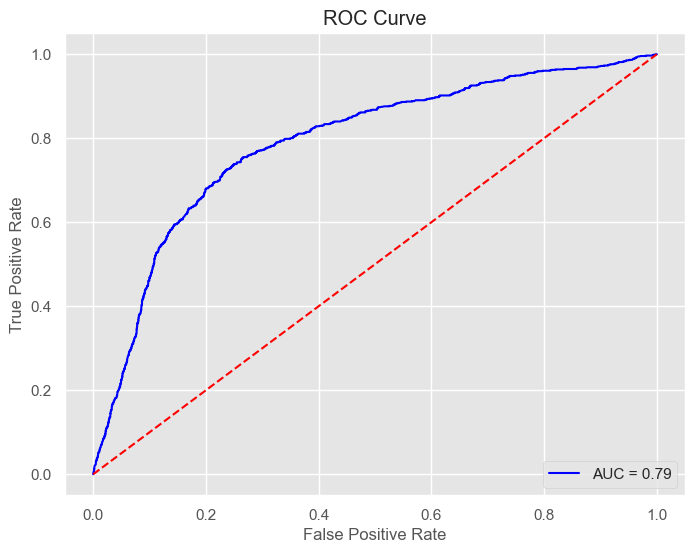

In [129]:
# Get the probabilities for the positive class
y_prob2 = lr.predict_proba(X_test)[:, 1]

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob2)

# Calculate AUC
auc = roc_auc_score(y_test, y_prob2)
print(f"AUC: {auc:.2f}")

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}', color='blue')
plt.plot([0, 1], [0, 1], linestyle='--', color='red')  
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

In [130]:
# Save the model and the scaler
import joblib

joblib.dump(gb, 'gb.pkl')
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']

### Saving Model and Scaler

#### Model and Scaler Persistence
The code snippet saves the trained Gradient Boosting classifier (`gb`) and the `scaler` using `joblib`:
- **Model**: Saves the trained Gradient Boosting classifier as `gb.pkl`.
- **Scaler**: Saves the fitted `scaler` as `scaler.pkl`.

#### Purpose
- **Persistence**: Ensures that the trained model and scaler can be reused later for predictions or further analysis without needing to retrain or refit.

#### Conclusion
Saving the model and scaler using `joblib` enables easy reuse and deployment in production environments or for future analyses, maintaining consistency and efficiency in model deployment.

In [131]:
gb = joblib.load('gb.pkl')
scaler = joblib.load('scaler.pkl')
test = pd.read_csv('/Users/marcoayuob/Downloads/Data science /2nd Semester/Machine Learning 1/Project/job_change_test.csv')

The same process we did in the training csv file we will aplly on the test file using the same scaler and model with hieghest balance accuracy, for the features selected on the train model only

In [132]:

scale_mapper = {
    '<10': 0, '10-49': 1, '50-99': 2, '100-500': 3, '500-999': 4,
    '1000-4999': 5, '5000-9999': 6, '10000+': 7, 'unknown': 8
}
test['size_of_company'] = test['size_of_company'].replace(scale_mapper)


In [133]:

mapping = {
    '>20': 21,
    '<1': 0,
    'unknown': -1  
}
test['years_of_experience'] = test['years_of_experience'].map(lambda x: mapping.get(x, x))

In [134]:

test = test[test['is_studying'] != 'no_information']
mapping = {'no': 0, 'part_time': 1, 'full_time': 2,}
test['is_studying_mapped'] = test['is_studying'].map(mapping)

In [135]:
bins = [20, 25, 30, 35, 40, 45, 50, 55]
labels = ['20-25', '26-30', '31-35', '36-40', '41-45', '46-50', '51-55']
test['age_group'] = pd.cut(test['age'], bins=bins, labels=labels, right=False)


In [136]:
encoder = OneHotEncoder()
county_encoded = encoder.fit_transform(test[['county']])
county_encoded_df = pd.DataFrame(county_encoded.toarray(), columns=encoder.get_feature_names_out(['county']))
n_clusters = 10 
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
county_clusters = kmeans.fit_predict(county_encoded)

test['county_cluster'] = county_clusters

test = test.join(county_encoded_df)
test.drop(columns=county_encoded_df.columns, axis=1, inplace=True)

In [137]:
test = test[['is_studying_mapped','is_certified','size_of_company', 'type_of_company', 'relative_wage', 'county_cluster','years_of_experience', 'age_group','field_of_studies']]

In [138]:

Dummy_type = pd.get_dummies(test['type_of_company'],prefix='type_of_company')
Dummy_study = pd.get_dummies(test['field_of_studies'],prefix='field_of_studies')
Dummy_country = pd.get_dummies(test['county_cluster'],prefix='county_cluster')
Dummy_age = pd.get_dummies(test['age_group'],prefix='age_group')

test = pd.concat([test, Dummy_country,Dummy_age, Dummy_type, Dummy_study], axis=1)

test = test.drop(['type_of_company','county_cluster', 'age_group', 'field_of_studies'], axis=1)


In [139]:
test = scaler.transform(test)
predictions = gb.predict(test)
predictions
predictions = pd.DataFrame(predictions, columns=['willing_to_change_job_predictions'])
predictions.to_csv('predictions.csv', index=False)
predictions
predictions['willing_to_change_job_predictions'].value_counts()

                      

willing_to_change_job_predictions
1    3081
0     174
Name: count, dtype: int64

### Project Overview and Predictions

#### Project Description
This project involves predicting job change behavior using a Gradient Boosting classifier (`gb`) trained on preprocessed data. Key steps include:
- **Data Preparation**: Features were selected (`app_train_selected`), categorical variables were one-hot encoded, and the dataset was split into training and testing sets with oversampling for class balance.
- **Model Training**: Gradient Boosting classifier (`gb`) was trained and evaluated using metrics like balanced accuracy, ROC curve, and AUC.
- **Model Persistence**: The trained model (`gb`) and `scaler` were saved using `joblib` for future use.

#### Making Predictions
- **Transformation**: Test data (`test`) was transformed using the fitted `scaler`.
- **Prediction**: Predictions were made using `gb.predict(test)`.
- **Output**: Predictions were saved to `predictions.csv` and displayed to understand the distribution of predicted classes.

#### Conclusion
The project successfully predicts job change behavior using machine learning techniques, leveraging preprocessing, model training, and evaluation steps. Saving the model and scaler ensures reusability for future predictions or deployments in similar scenarios.